In [1]:
library(tidyverse)
library(reshape2)
#options(repr.plot.width = 4, repr.plot.height = 3)  # set plot size

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats

Attaching package: ‘reshape2’

The following object is masked from ‘package:tidyr’:

    smiths



In [2]:
train = read_csv("../data/trainEng.csv")

Parsed with column specification:
cols(
  .default = col_integer(),
  LotFrontage = col_double(),
  LogLotArea = col_double(),
  Neighborhood = col_character(),
  YearBuilt = col_character(),
  YearRemodAdd = col_character(),
  Exterior = col_character(),
  ExterCond = col_character(),
  Foundation = col_character(),
  LogTotalBsmtSF = col_double(),
  Log1stFlrSF = col_double(),
  LogGrLivArea = col_double(),
  LogTotalArea = col_double(),
  FullBath = col_double(),
  HalfBath = col_double(),
  GarageYrBlt = col_character(),
  GarageFinish = col_character(),
  GarageCars = col_double(),
  MoSold = col_character(),
  SaleType = col_character(),
  LogSalePrice = col_double()
)
See spec(...) for full column specifications.


In [3]:
dim(train)

[1] 1460   55

In [4]:
vars = c("LotFrontage", "LogLotArea", "LogTotalBsmtSF", "Log1stFlrSF", "LogGrLivArea", "LogTotalArea", "TotalPorchSF")
mat = cor(train[, c(vars, "LogSalePrice")])
mat

LotFrontage LogLotArea LogTotalBsmtSF Log1stFlrSF LogGrLivArea
LotFrontage    1.0000000   0.5665034  0.1299744      0.4014096   0.3336801   
LogLotArea     0.5665034   1.0000000  0.1255214      0.4674648   0.3854352   
LogTotalBsmtSF 0.1299744   0.1255214  1.0000000      0.2882404   0.2066373   
Log1stFlrSF    0.4014096   0.4674648  0.2882404      1.0000000   0.5459838   
LogGrLivArea   0.3336801   0.3854352  0.2066373      0.5459838   1.0000000   
LogTotalArea   0.3792882   0.4268220  0.5650552      0.7473212   0.8672684   
TotalPorchSF   0.1295392   0.1662365  0.1072499      0.1520445   0.2693661   
LogSalePrice   0.3355547   0.3999177  0.3728379      0.6089467   0.7302549   
               LogTotalArea TotalPorchSF LogSalePrice
LotFrontage    0.3792882    0.1295392    0.3355547   
LogLotArea     0.4268220    0.1662365    0.3999177   
LogTotalBsmtSF 0.5650552    0.1072499    0.3728379   
Log1stFlrSF    0.7473212    0.1520445    0.6089467   
LogGrLivArea   0.8672684    0.2693661    0.7302549   
LogTotalArea   1.0000000    0.2539046    0.8035906   
TotalPorchSF   0.2539046    1.0000000    0.1951663   
LogSalePrice   0.8035906    0.1951663    1.0000000

## Correlation Heatmap

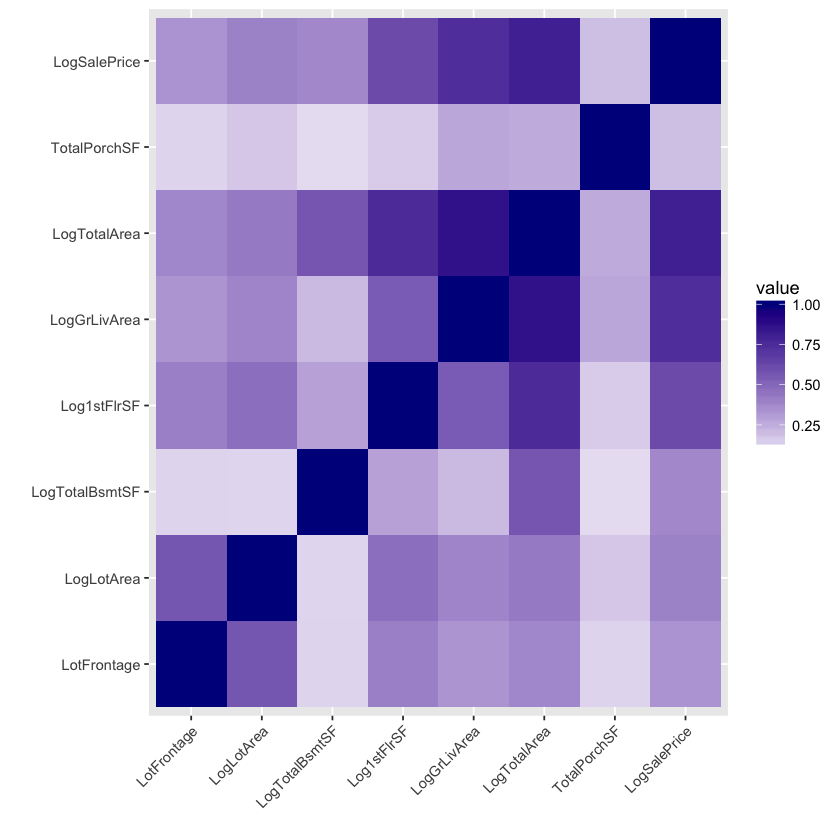

In [5]:
meltMat = melt(mat)
ggplot(data = meltMat, mapping = aes(x = Var1, y = Var2)) + 
    geom_tile(mapping = aes(fill = value)) +
    labs(x = "", y = "") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) + 
    scale_fill_gradient2(low = "lightblue", high = "darkblue")

## Plot Sale Price vs. Total Area against all categorical variables

Recall that Total Area is the sum of living space above ground (GrLivArea) and basement space below ground (TotalBsmtSF). This variable is of special interest since it has the highest correlation with Sale Price.

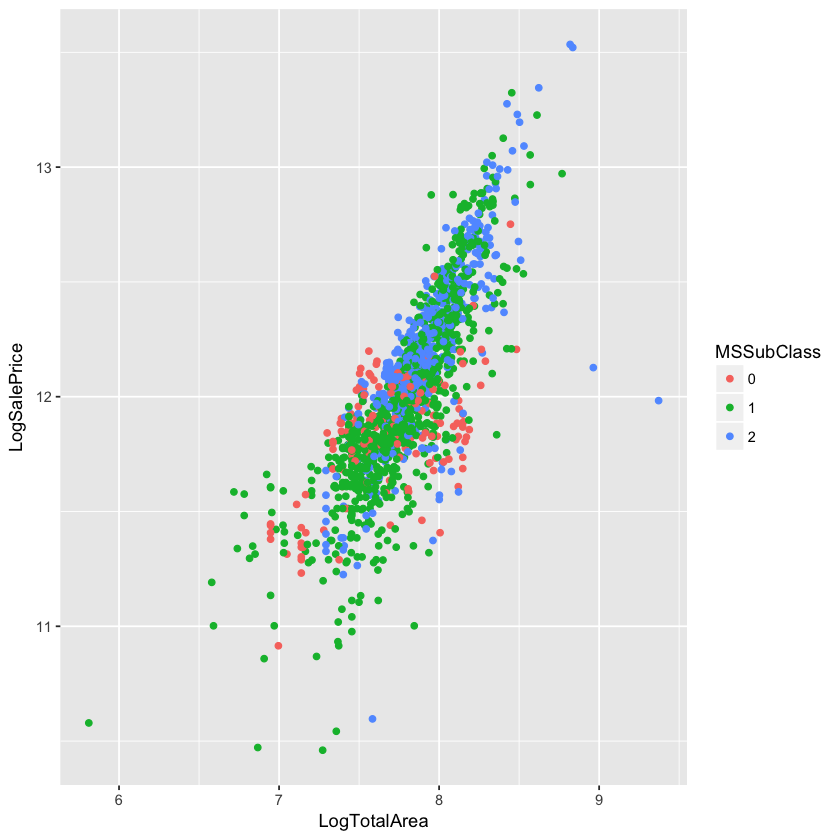

In [6]:
ggplot(train, aes(x = LogTotalArea, y = LogSalePrice, color = factor(MSSubClass))) +
    geom_point() +
    labs(color = "MSSubClass")

2-2.5 story tends to a characteristic of expensive houses.

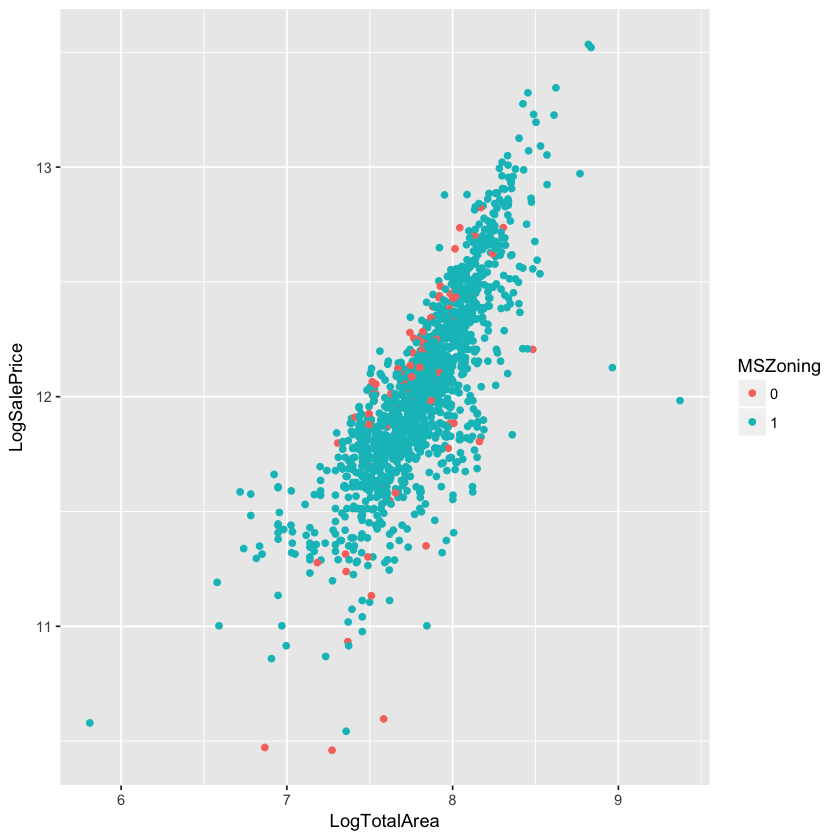

In [7]:
ggplot(train, aes(x = LogTotalArea, y = LogSalePrice, color = factor(MSZoning))) +
    geom_point() +
    labs(color = "MSZoning")

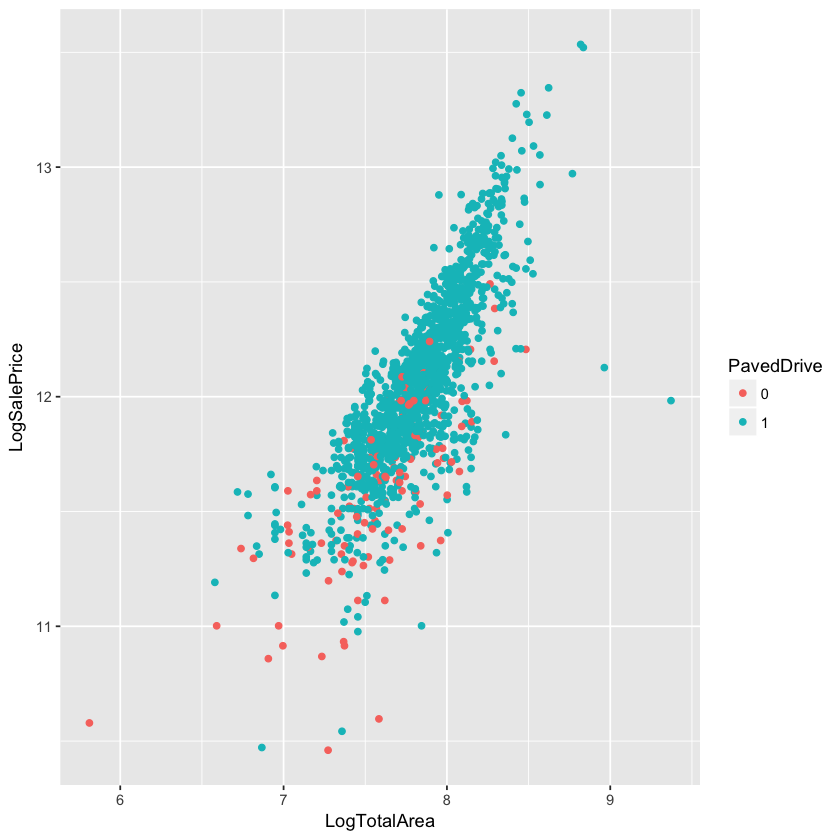

In [8]:
ggplot(train, aes(x = LogTotalArea, y = LogSalePrice, color = factor(PavedDrive))) +
    geom_point() +
    labs(color = "PavedDrive")

Cheaper houses tend to not have paved driveways.

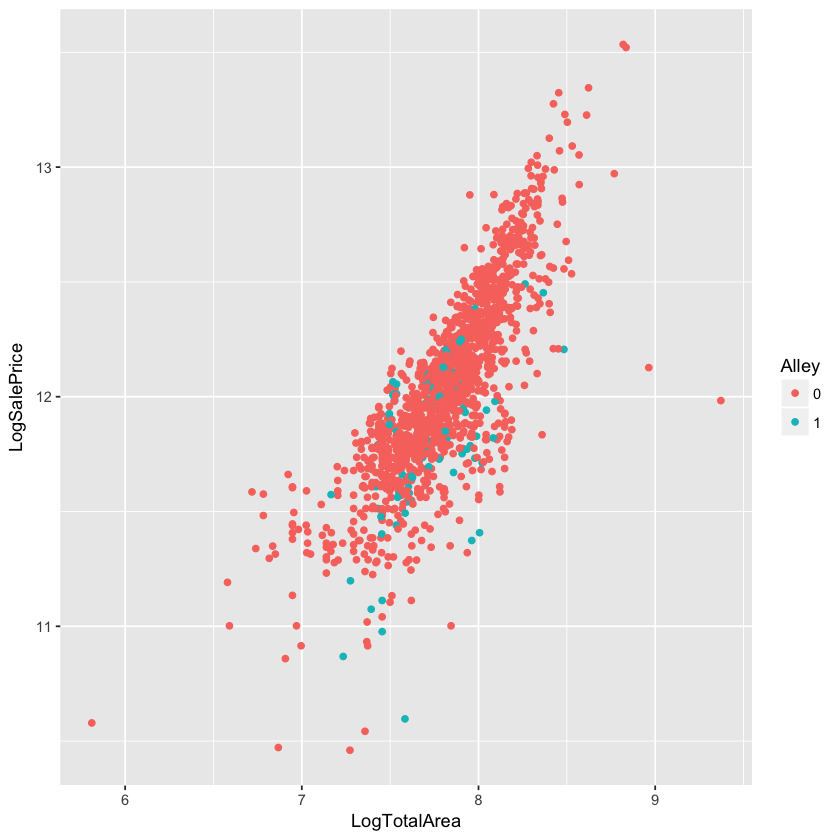

In [9]:
ggplot(train, aes(x = LogTotalArea, y = LogSalePrice, color = factor(Alley))) +
    geom_point() +
    labs(color = "Alley")

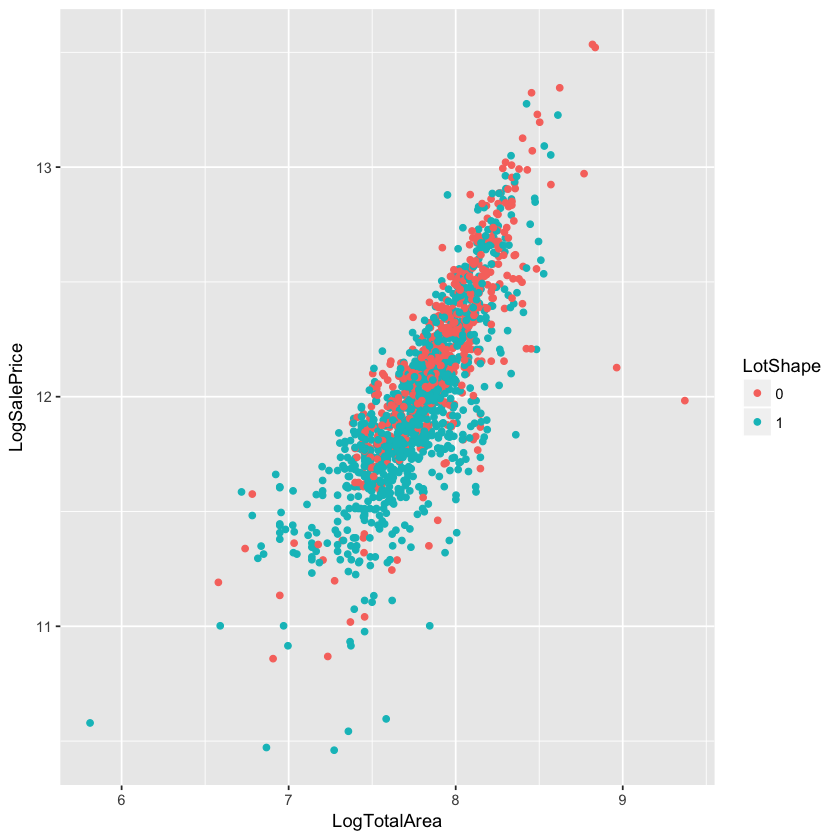

In [10]:
ggplot(train, aes(x = LogTotalArea, y = LogSalePrice, color = factor(LotShape))) +
    geom_point() +
    labs(color = "LotShape")

As the house price increases, the lot shape tends to get irregular.

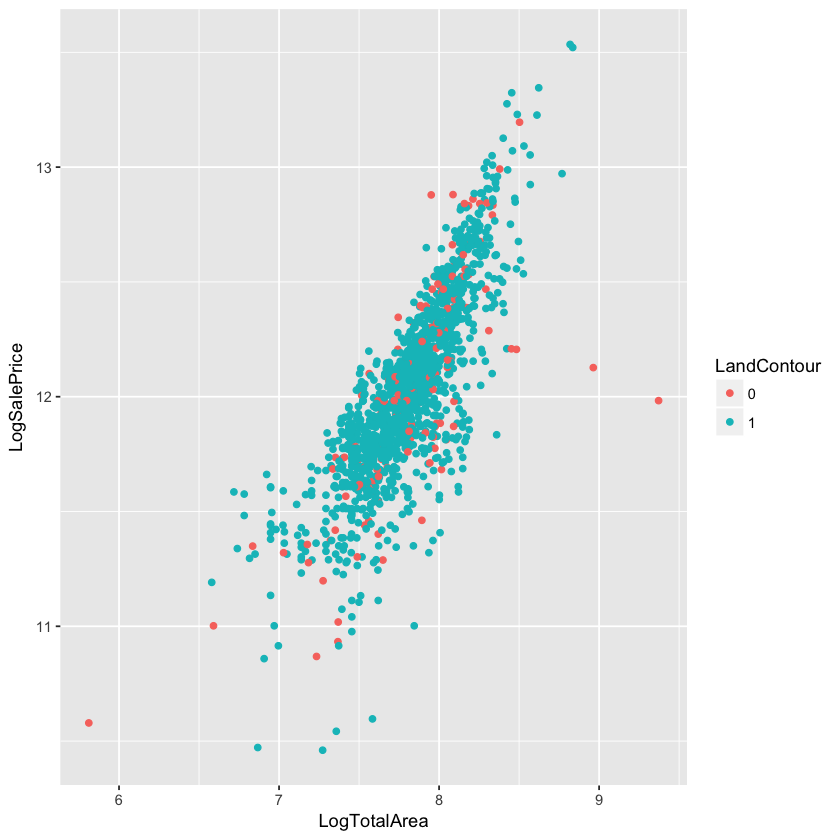

In [11]:
ggplot(train, aes(x = LogTotalArea, y = LogSalePrice, color = factor(LandContour))) +
    geom_point() +
    labs(color = "LandContour")

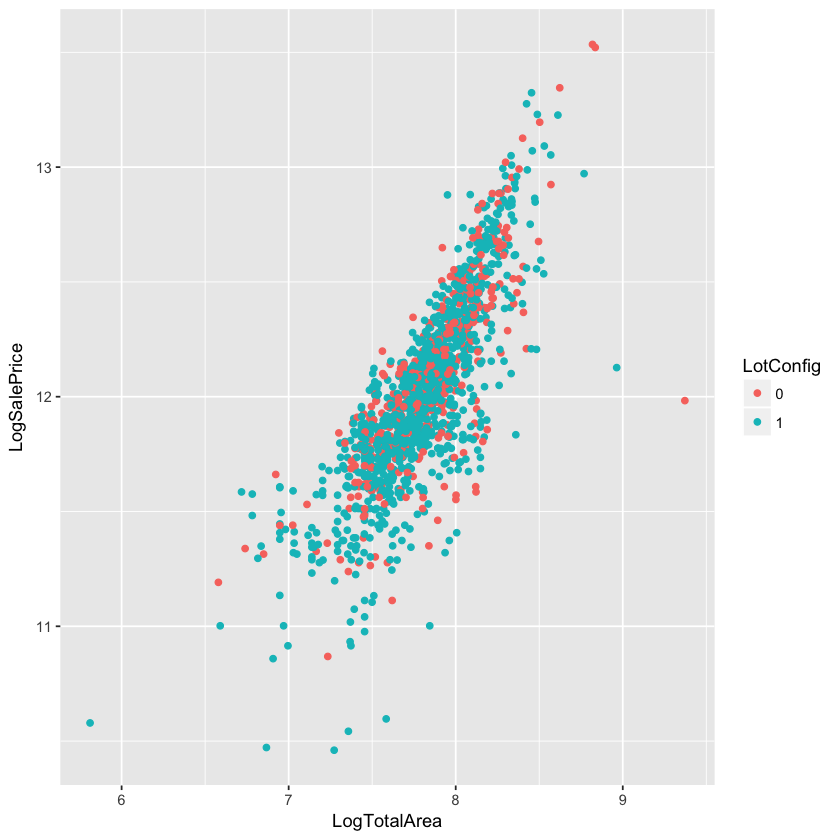

In [12]:
ggplot(train, aes(x = LogTotalArea, y = LogSalePrice, color = factor(LotConfig))) +
    geom_point() +
    labs(color = "LotConfig")

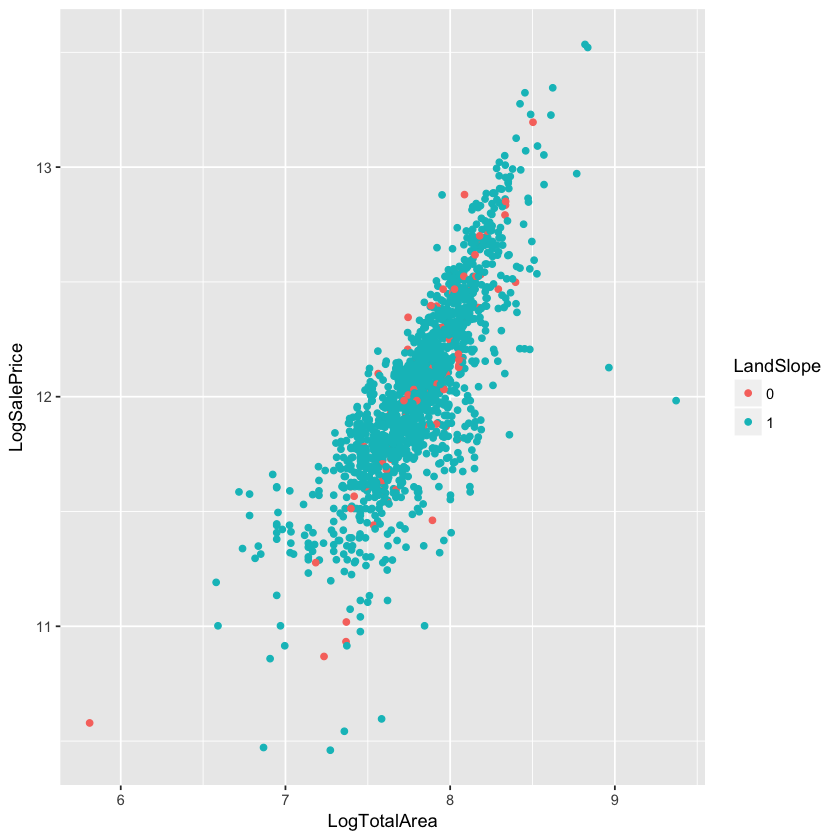

In [13]:
ggplot(train, aes(x = LogTotalArea, y = LogSalePrice, color = factor(LandSlope))) +
    geom_point() +
    labs(color = "LandSlope")

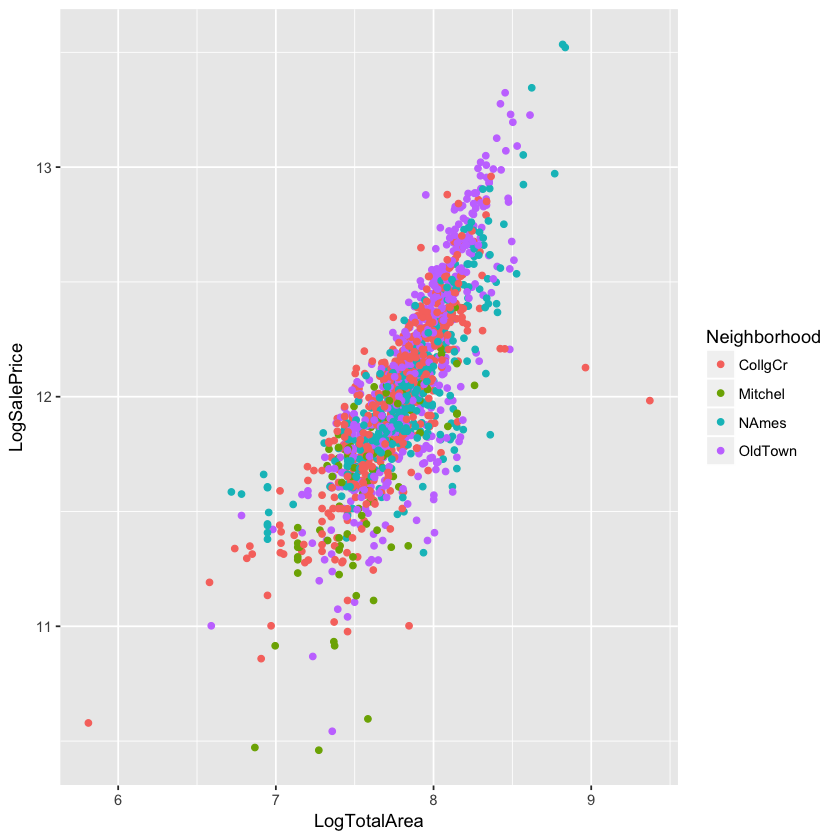

In [14]:
ggplot(train, aes(x = LogTotalArea, y = LogSalePrice, color = factor(Neighborhood))) +
    geom_point() +
    labs(color = "Neighborhood")

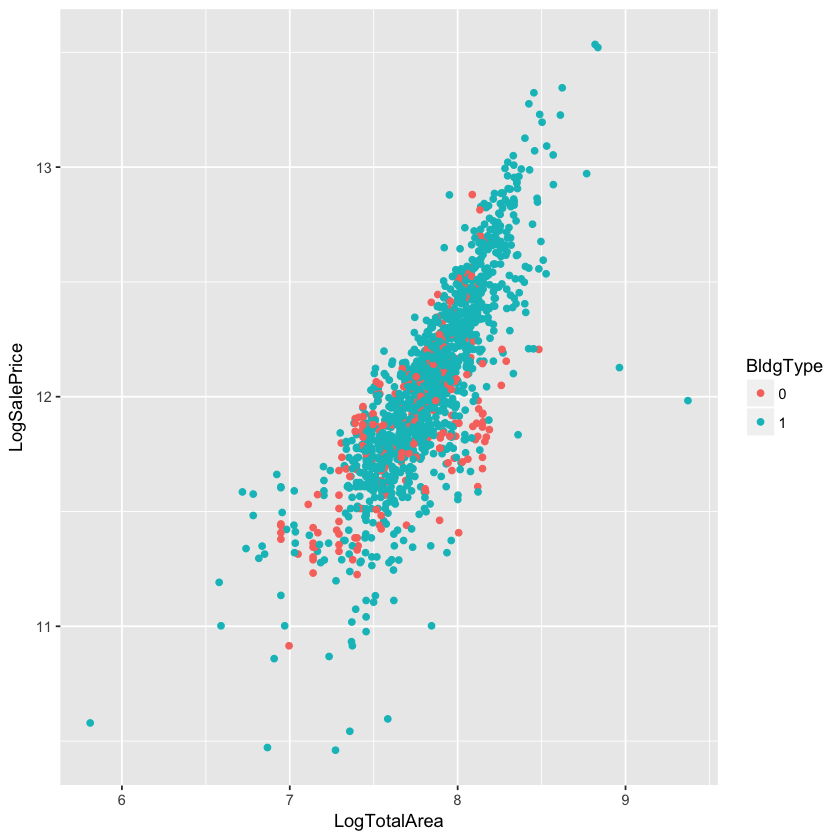

In [15]:
ggplot(train, aes(x = LogTotalArea, y = LogSalePrice, color = factor(BldgType))) +
    geom_point() +
    labs(color = "BldgType")

Cheaper houses tend to be single-family detached.

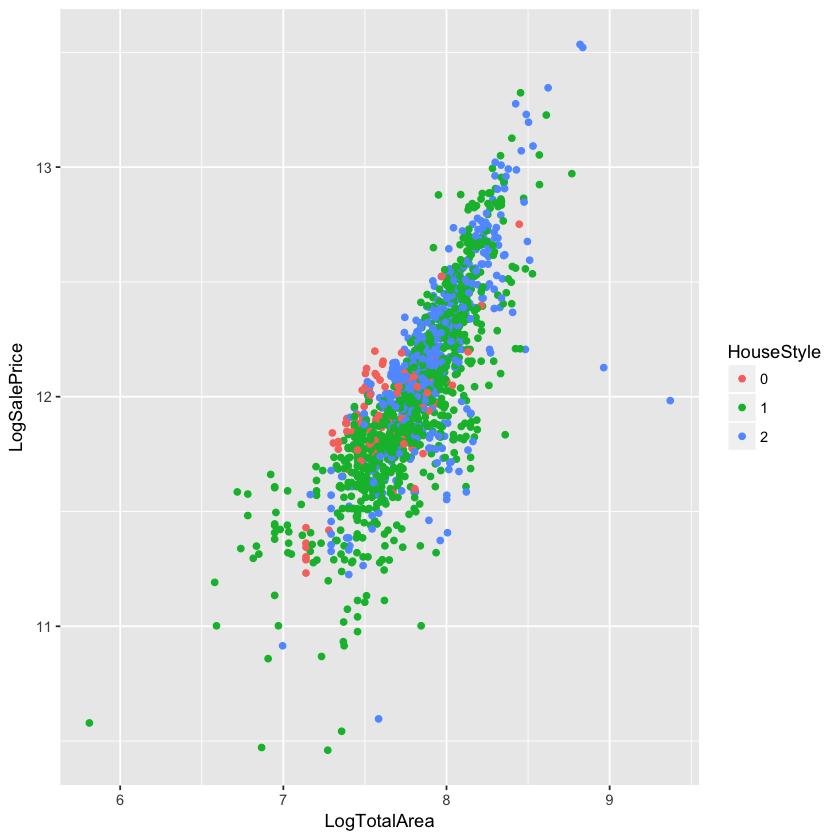

In [16]:
ggplot(train, aes(x = LogTotalArea, y = LogSalePrice, color = factor(HouseStyle))) +
    geom_point() +
    labs(color = "HouseStyle")

2-2.5 story tends to a feature of expensive houses. The "other" category describes cheaper houses. 1-1.5 story houses are common across the board. 

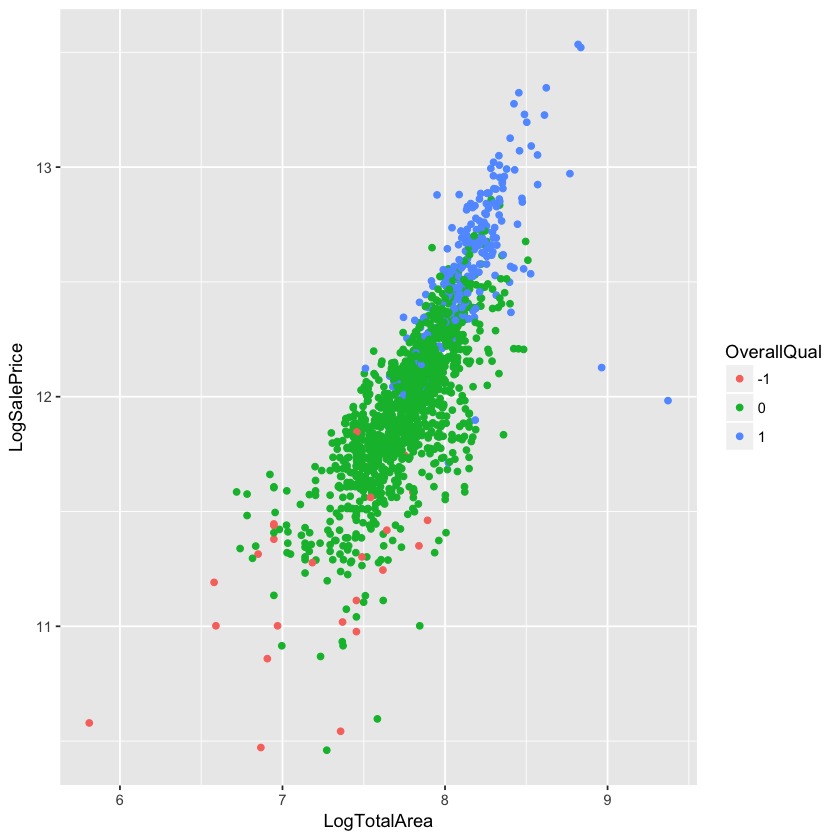

In [17]:
ggplot(train, aes(x = LogTotalArea, y = LogSalePrice, color = factor(OverallQual))) +
    geom_point() +
    labs(color = "OverallQual")

The overall material and finish of the house tends to be excellent for expensive houses, poor for cheaper houses, and average for mid-range houses.

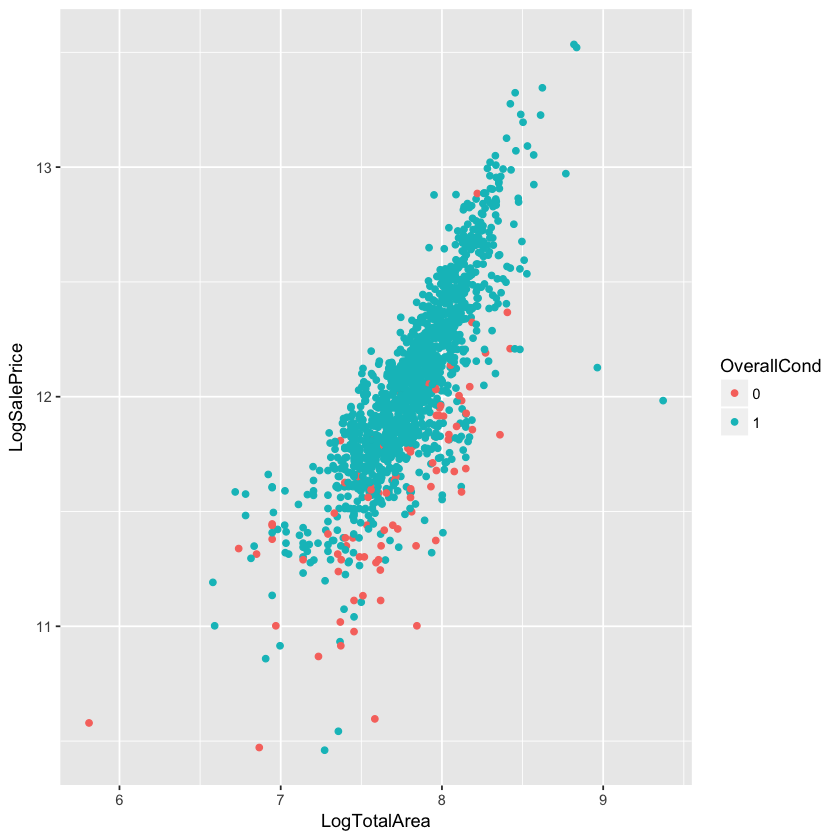

In [18]:
ggplot(train, aes(x = LogTotalArea, y = LogSalePrice, color = factor(OverallCond))) +
    geom_point() +
    labs(color = "OverallCond")

The overall condition of the house tends to be below average for cheaper houses.

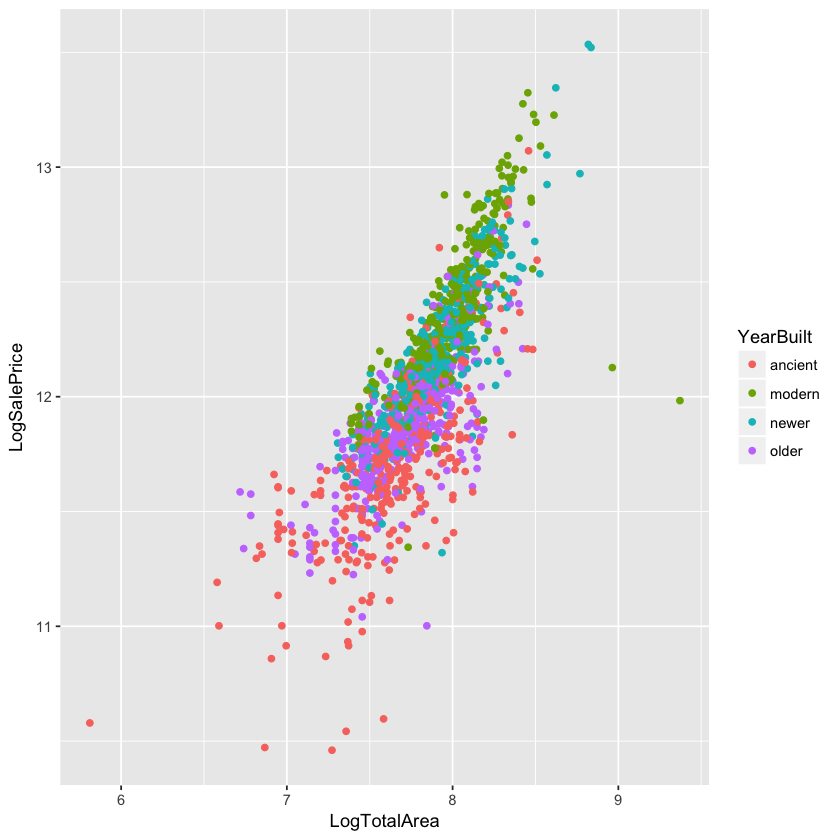

In [19]:
ggplot(train, aes(x = LogTotalArea, y = LogSalePrice, color = factor(YearBuilt))) +
    geom_point() +
    labs(color = "YearBuilt")

Expensive houses tend to be newly built (after 1973), but not cheaper houses.

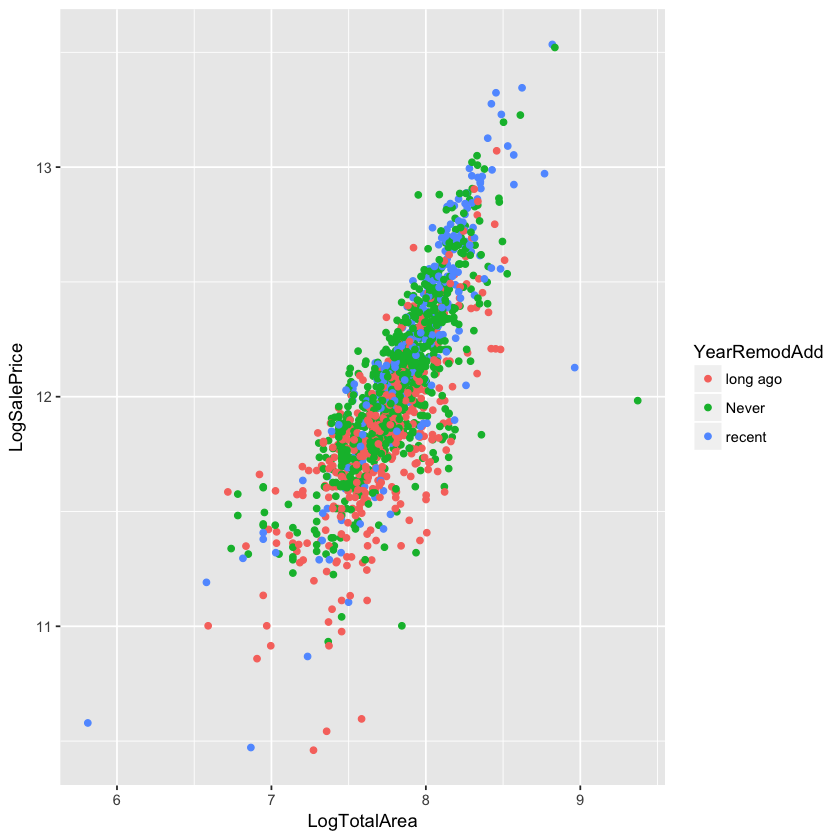

In [20]:
ggplot(train, aes(x = LogTotalArea, y = LogSalePrice, color = factor(YearRemodAdd))) +
    geom_point() +
    labs(color = "YearRemodAdd")

Cheaper houses were built before 1973 and they haven't been remodeled within the last 10 years. Expensive houses are new-ish structures, built after 1973, and they were remodeled within the recent 10 years.

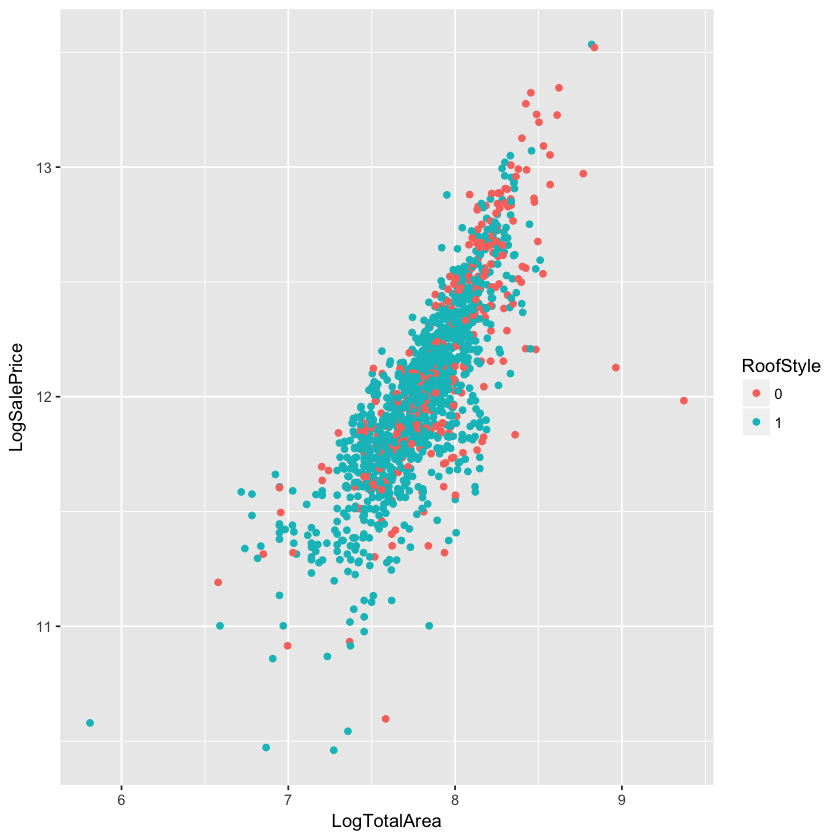

In [21]:
ggplot(train, aes(x = LogTotalArea, y = LogSalePrice, color = factor(RoofStyle))) +
    geom_point() +
    labs(color = "RoofStyle")

The more expensive a house gets, the more it tends to not have a gable roof. It may instead have one of the following roof types: flat, gambrel, hip, mansard, or shed.

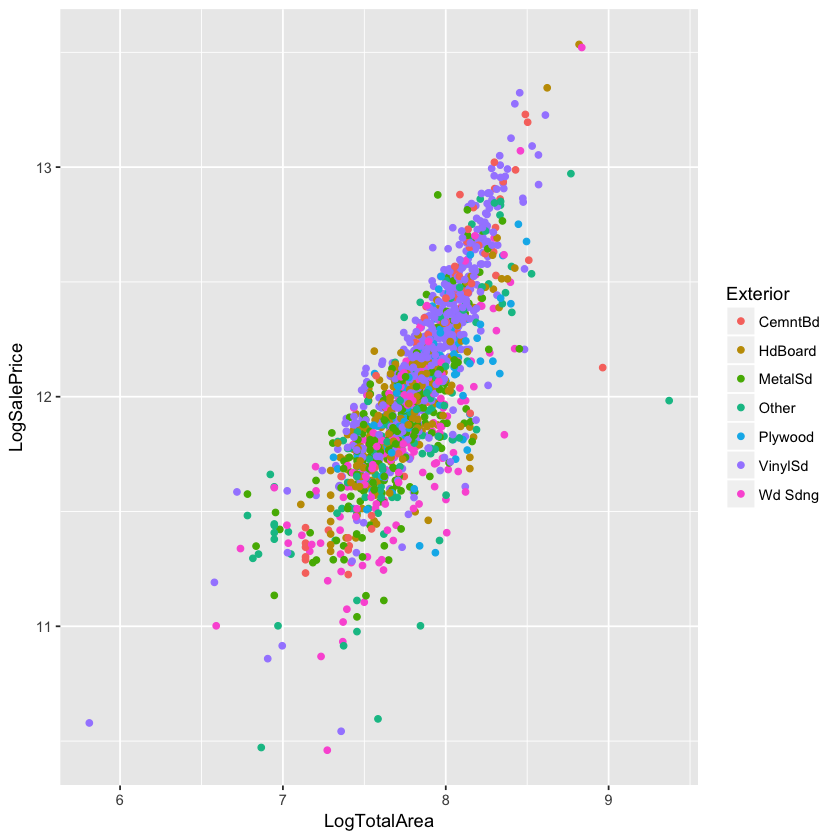

In [22]:
ggplot(train, aes(x = LogTotalArea, y = LogSalePrice, color = factor(Exterior))) +
    geom_point() +
    labs(color = "Exterior")

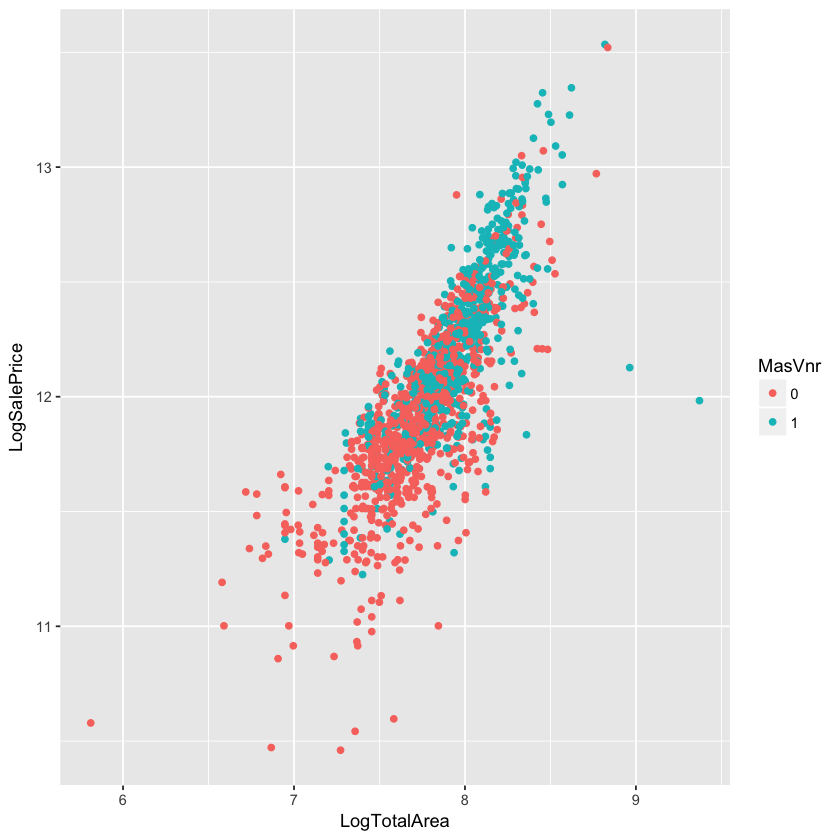

In [23]:
ggplot(train, aes(x = LogTotalArea, y = LogSalePrice, color = factor(MasVnr))) +
    geom_point() +
    labs(color = "MasVnr")

Expensive houses tend to have masonry veneer walls.

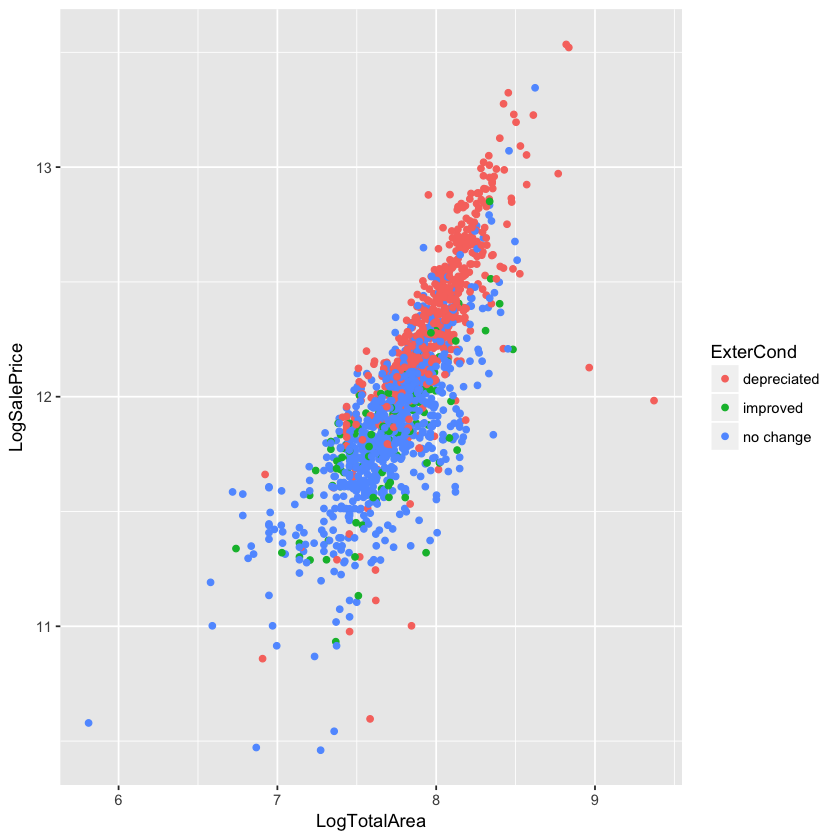

In [24]:
ggplot(train, aes(x = LogTotalArea, y = LogSalePrice, color = factor(ExterCond))) +
    geom_point() +
    labs(color = "ExterCond")

The quality of material on the exterior of expensive houses depreciate over time, but it stays unchanged for cheaper houses.

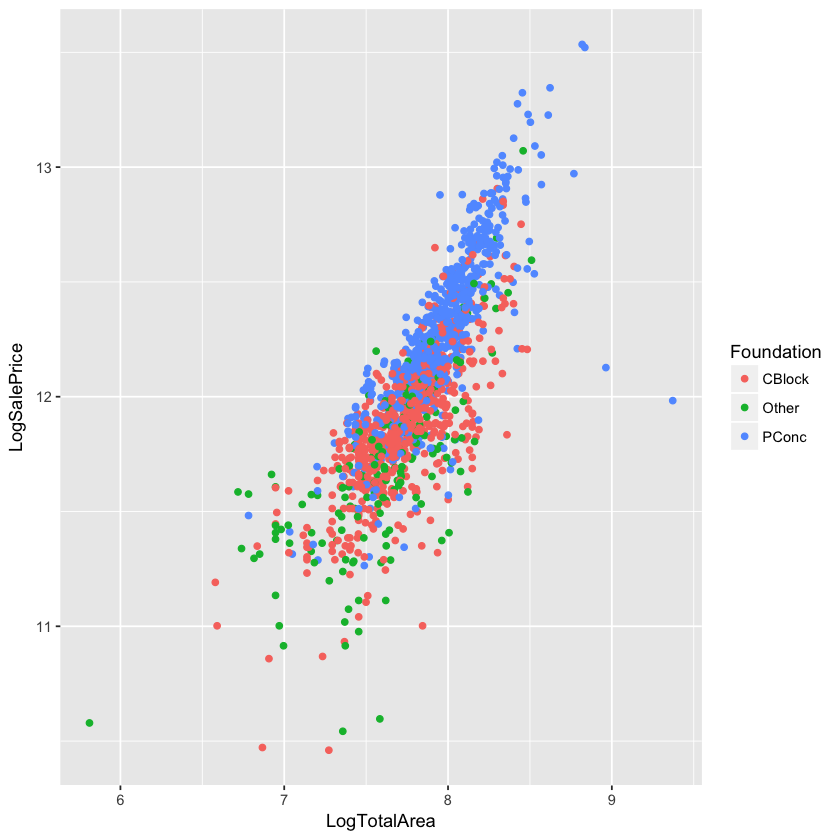

In [25]:
ggplot(train, aes(x = LogTotalArea, y = LogSalePrice, color = factor(Foundation))) +
    geom_point() +
    labs(color = "Foundation")

Expensive houses tend to have poured concrete foundation, whereas cheaper houses tend to have cinder block foundation or some other material.

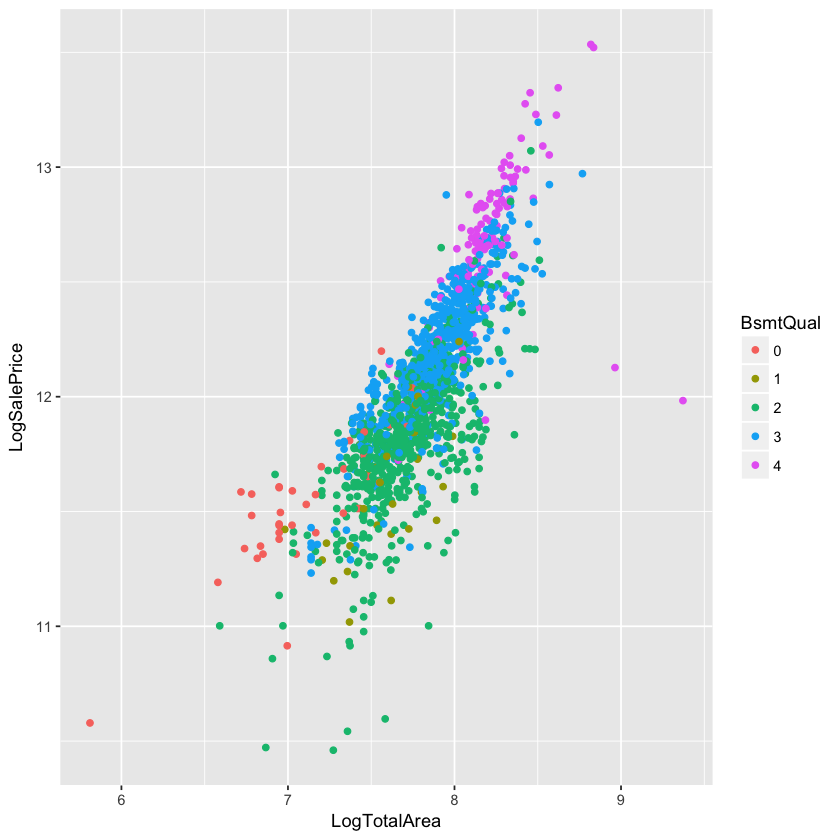

In [26]:
ggplot(train, aes(x = LogTotalArea, y = LogSalePrice, color = factor(BsmtQual))) +
    geom_point() +
    labs(color = "BsmtQual")

The height of the basements in expensive houses tend to atleast 90 inches. If cheaper houses have a basement, its height is under 90 inches.

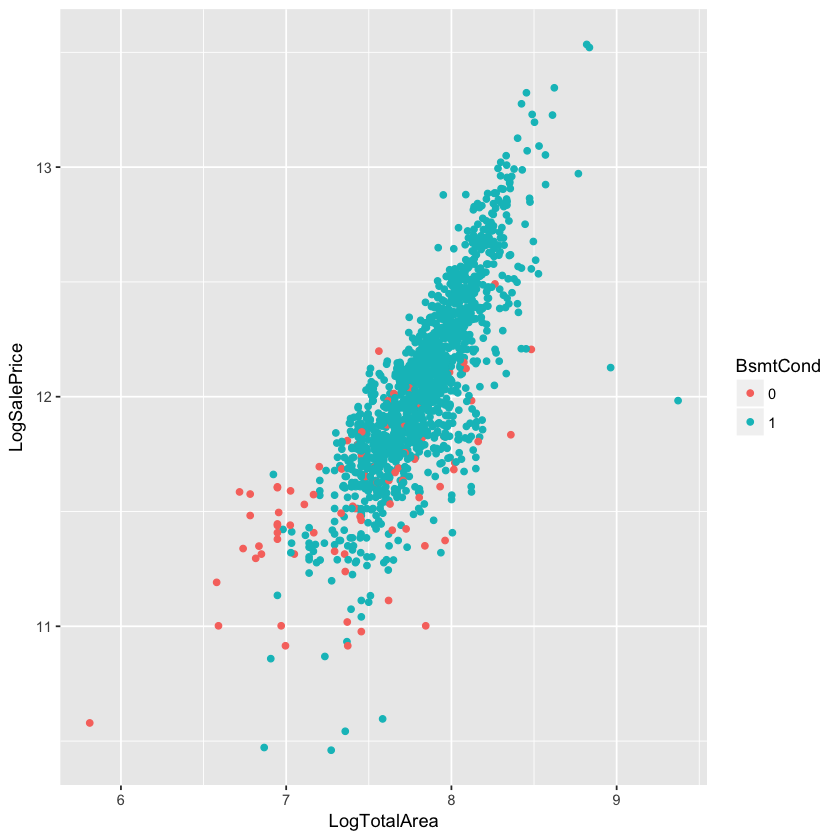

In [27]:
ggplot(train, aes(x = LogTotalArea, y = LogSalePrice, color = factor(BsmtCond))) +
    geom_point() +
    labs(color = "BsmtCond")

Either not having a basement or having below average quality basement is a feature of cheaper houses.

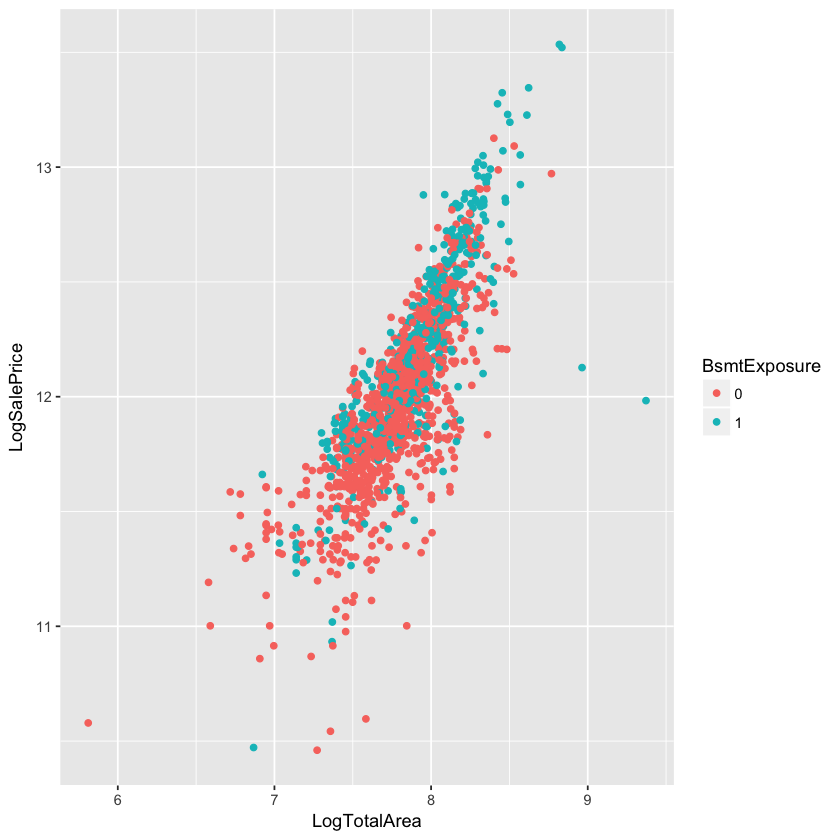

In [28]:
ggplot(train, aes(x = LogTotalArea, y = LogSalePrice, color = factor(BsmtExposure))) +
    geom_point() +
    labs(color = "BsmtExposure")

Expensive houses tend to have a walkout or garden level walls.

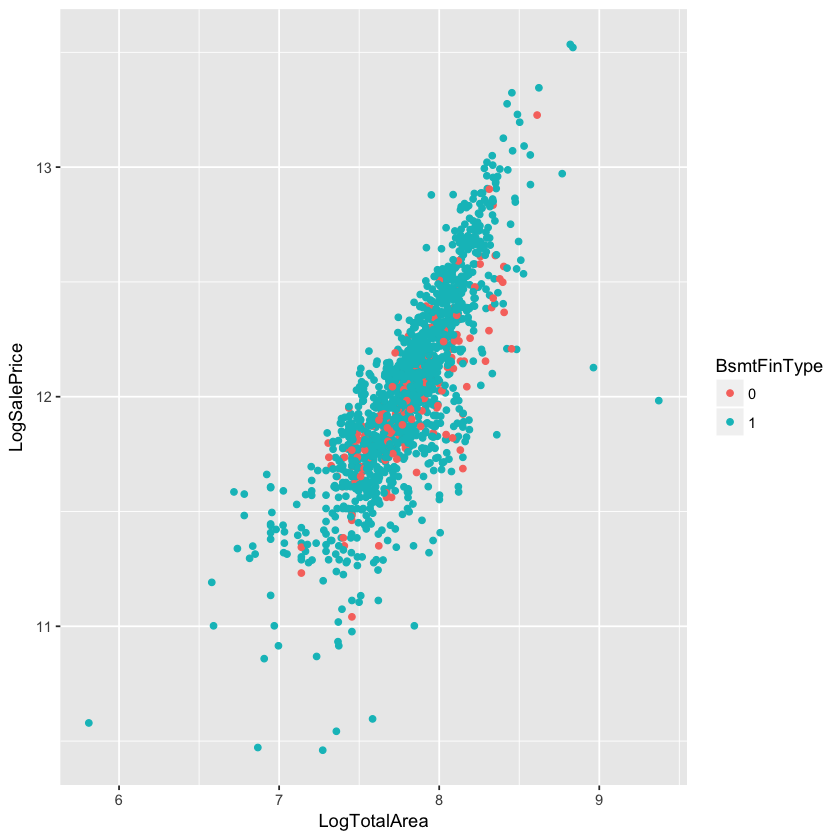

In [29]:
ggplot(train, aes(x = LogTotalArea, y = LogSalePrice, color = factor(BsmtFinType))) +
    geom_point() +
    labs(color = "BsmtFinType")

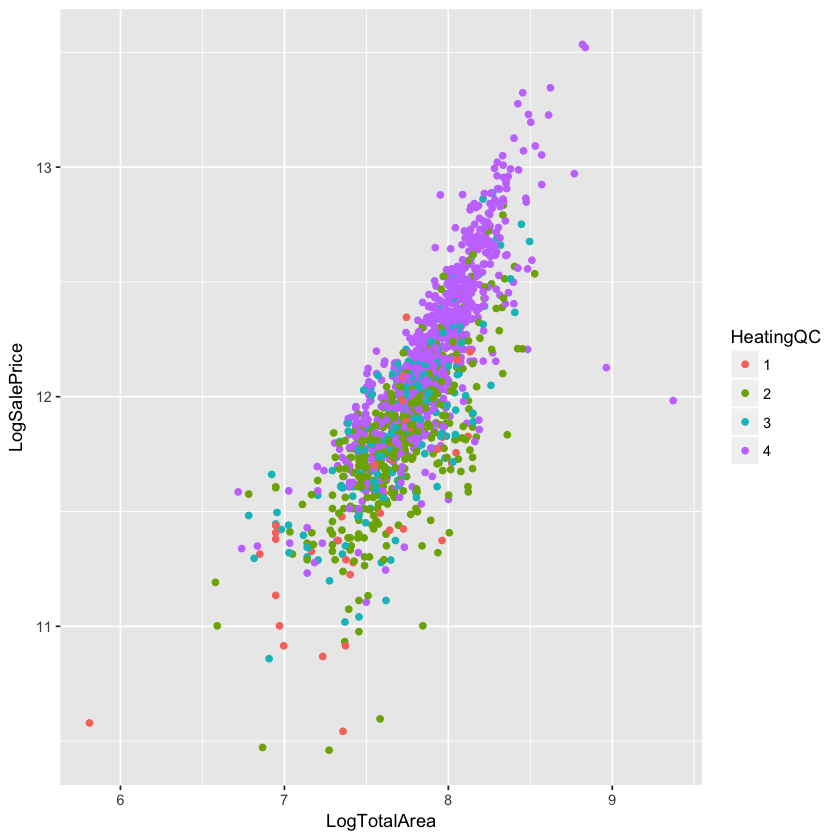

In [30]:
ggplot(train, aes(x = LogTotalArea, y = LogSalePrice, color = factor(HeatingQC))) +
    geom_point() +
    labs(color = "HeatingQC")

The heating quality improves as the house price increases.

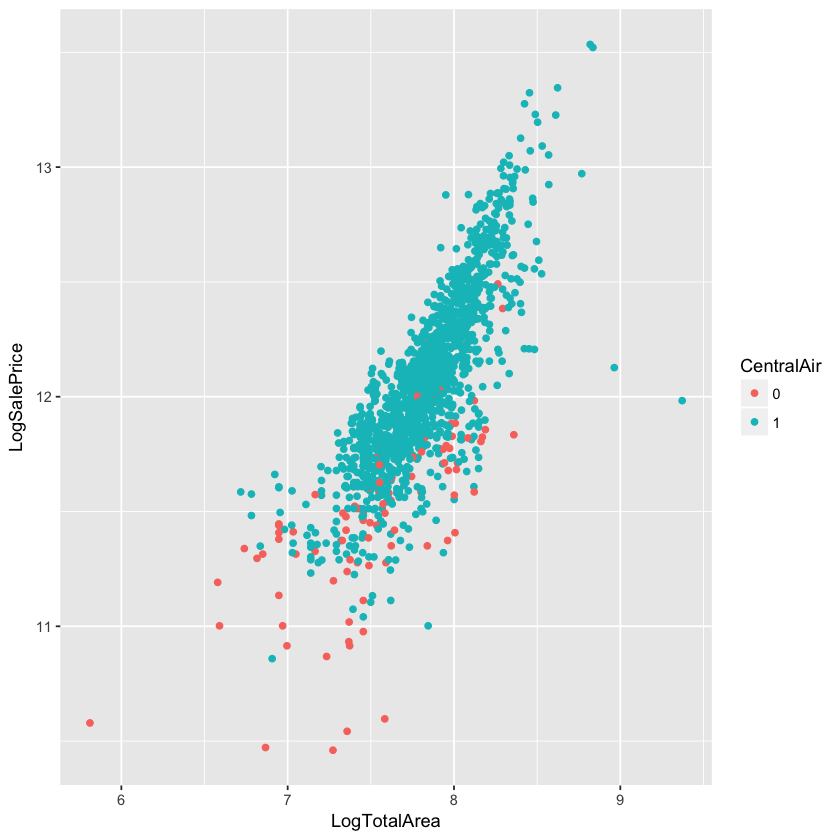

In [31]:
ggplot(train, aes(x = LogTotalArea, y = LogSalePrice, color = factor(CentralAir))) +
    geom_point() +
    labs(color = "CentralAir")

Cheaper houses tend to not have central air.

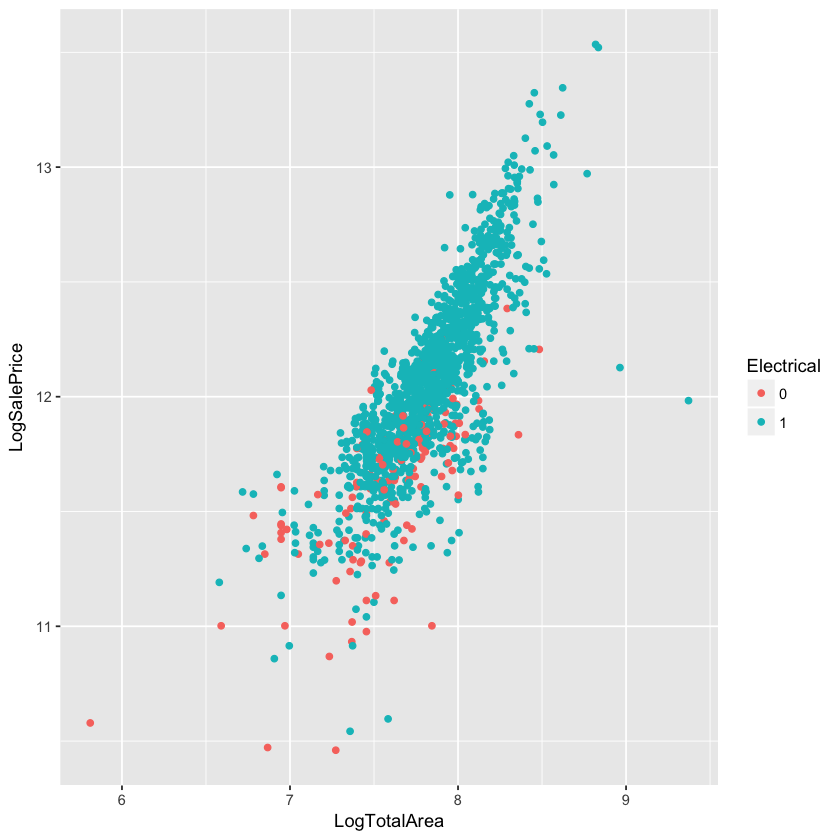

In [32]:
ggplot(train, aes(x = LogTotalArea, y = LogSalePrice, color = factor(Electrical))) +
    geom_point() +
    labs(color = "Electrical")

Cheaper houses tend to not have a standard circuit breaker. They instead have a fuse box that is either average, fair, or poor in quality.

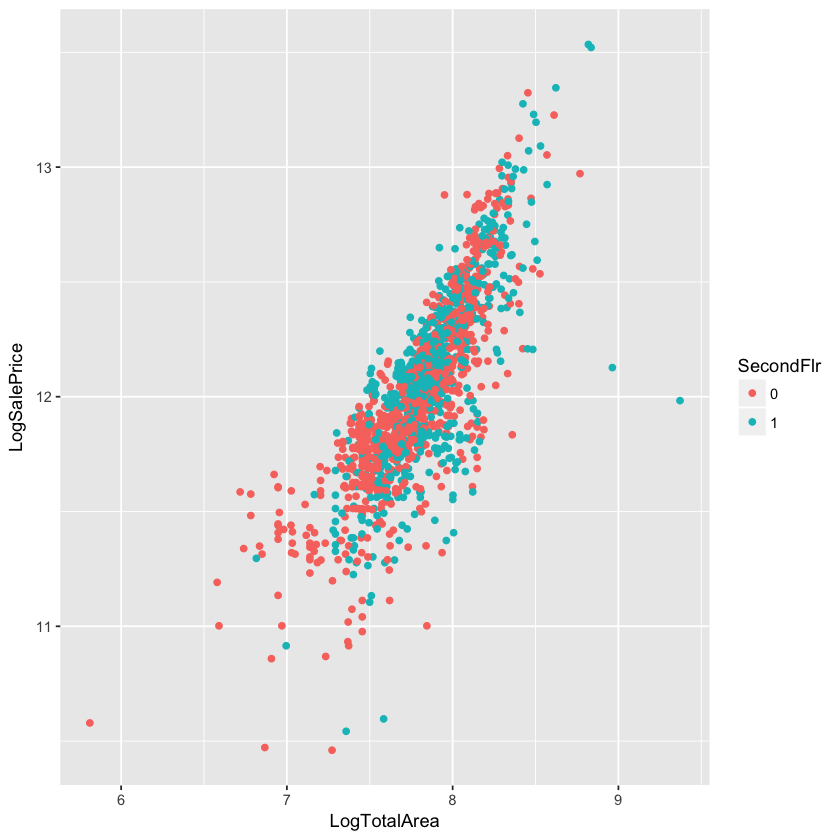

In [33]:
ggplot(train, aes(x = LogTotalArea, y = LogSalePrice, color = factor(SecondFlr))) +
    geom_point() +
    labs(color = "SecondFlr")

Mid-range to expensive houses tend to have a second floor.

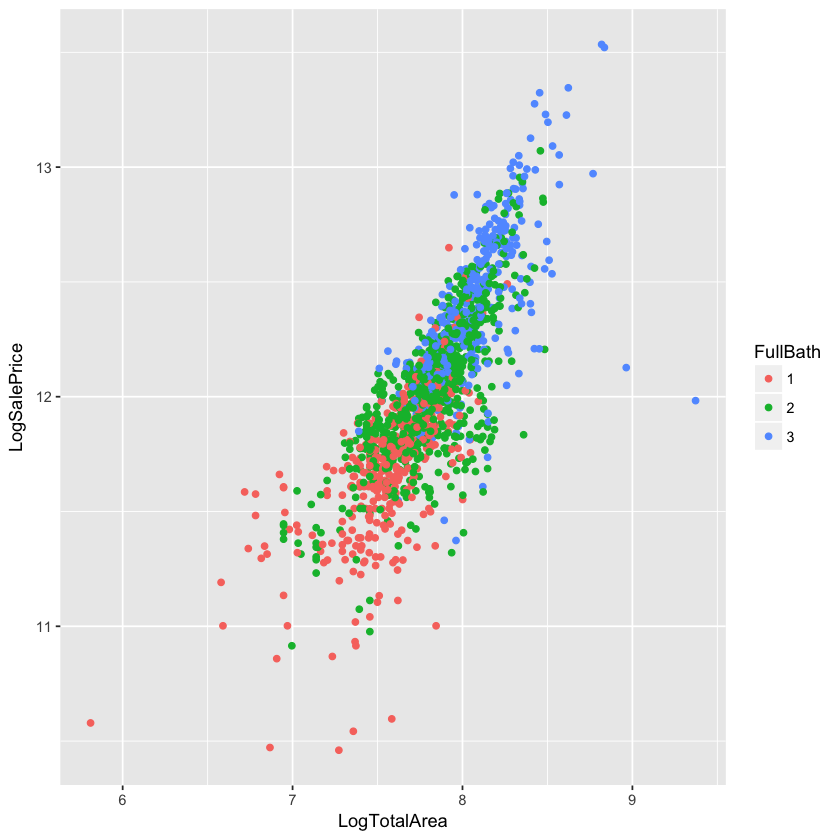

In [34]:
ggplot(train, aes(x = LogTotalArea, y = LogSalePrice, color = factor(FullBath))) +
    geom_point() +
    labs(color = "FullBath")

Expensive houses tend to have atleast 3 full bathrooms. Cheaper houses have 1 full bathroom. Mid-range houses have 2 full bathrooms.

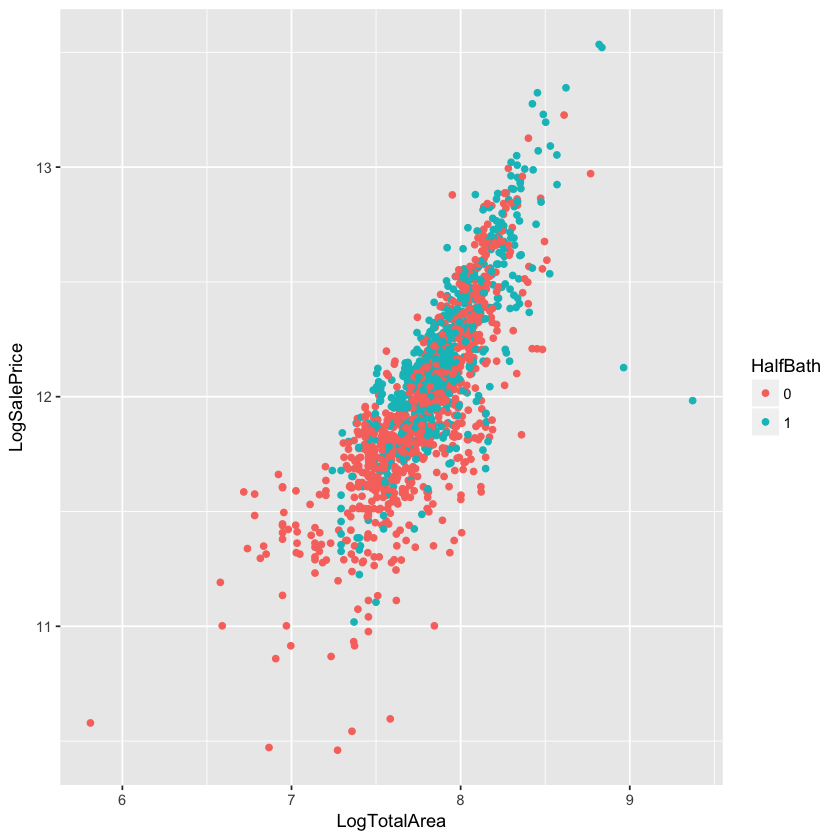

In [35]:
ggplot(train, aes(x = LogTotalArea, y = LogSalePrice, color = factor(HalfBath))) +
    geom_point() +
    labs(color = "HalfBath")

Mid-range to expensive houses tend to have a half bathroom, whereas cheaper houses don't have one.

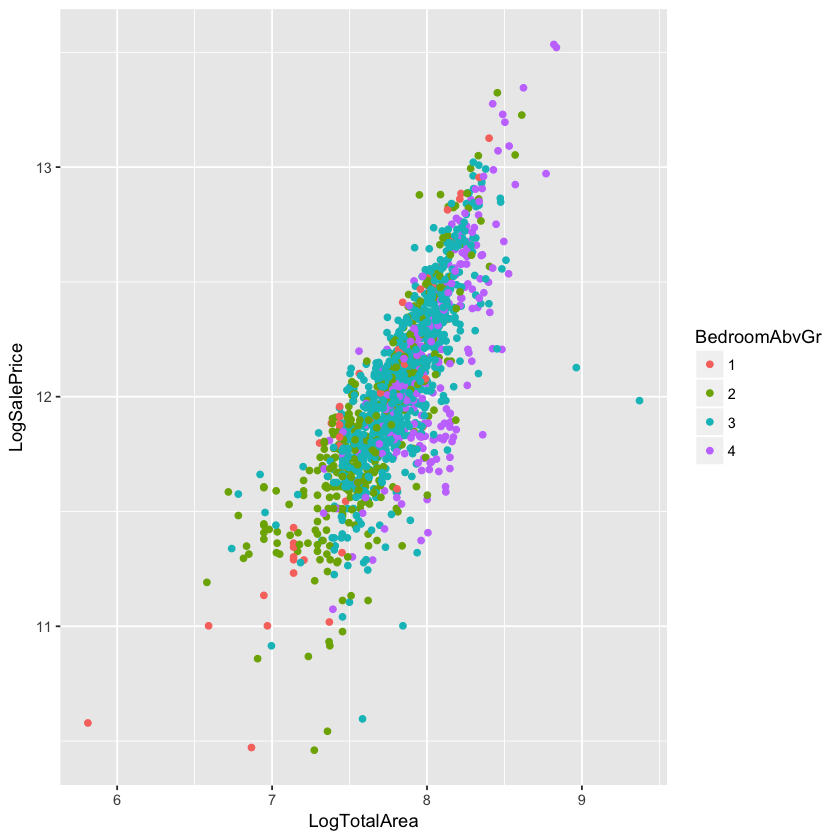

In [36]:
ggplot(train, aes(x = LogTotalArea, y = LogSalePrice, color = factor(BedroomAbvGr))) +
    geom_point() +
    labs(color = "BedroomAbvGr")

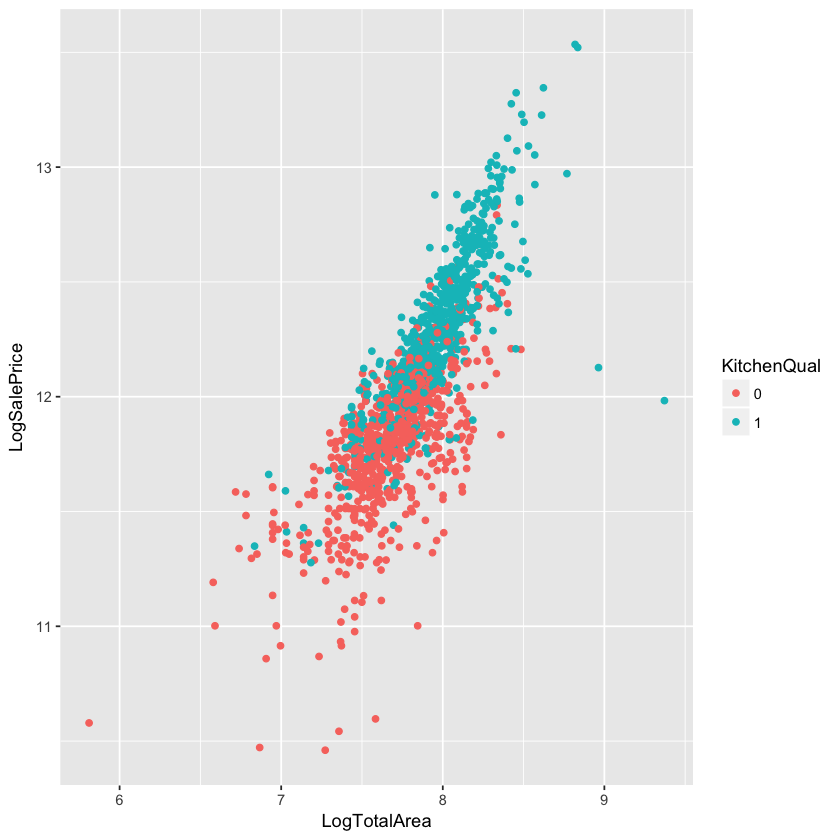

In [37]:
ggplot(train, aes(x = LogTotalArea, y = LogSalePrice, color = factor(KitchenQual))) +
    geom_point() +
    labs(color = "KitchenQual")

The kitchen quality in expensive houses is above average. This is not true for cheaper houses.

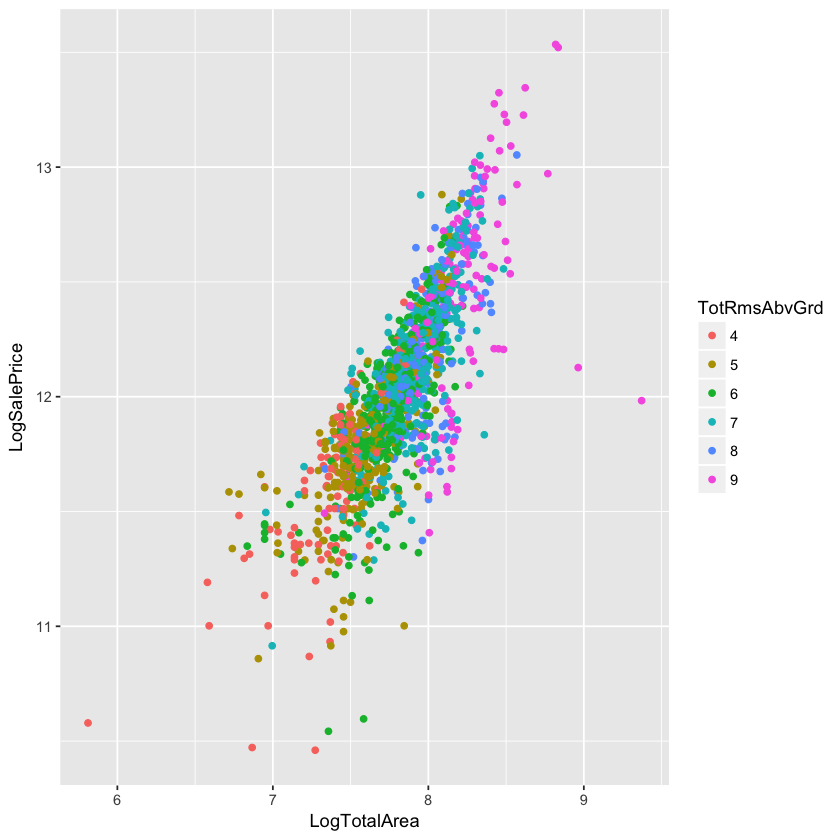

In [38]:
ggplot(train, aes(x = LogTotalArea, y = LogSalePrice, color = factor(TotRmsAbvGrd))) +
    geom_point() +
    labs(color = "TotRmsAbvGrd")

It is clear that the more expensive a house gets, the more rooms it tends to have (excluding bathrooms).

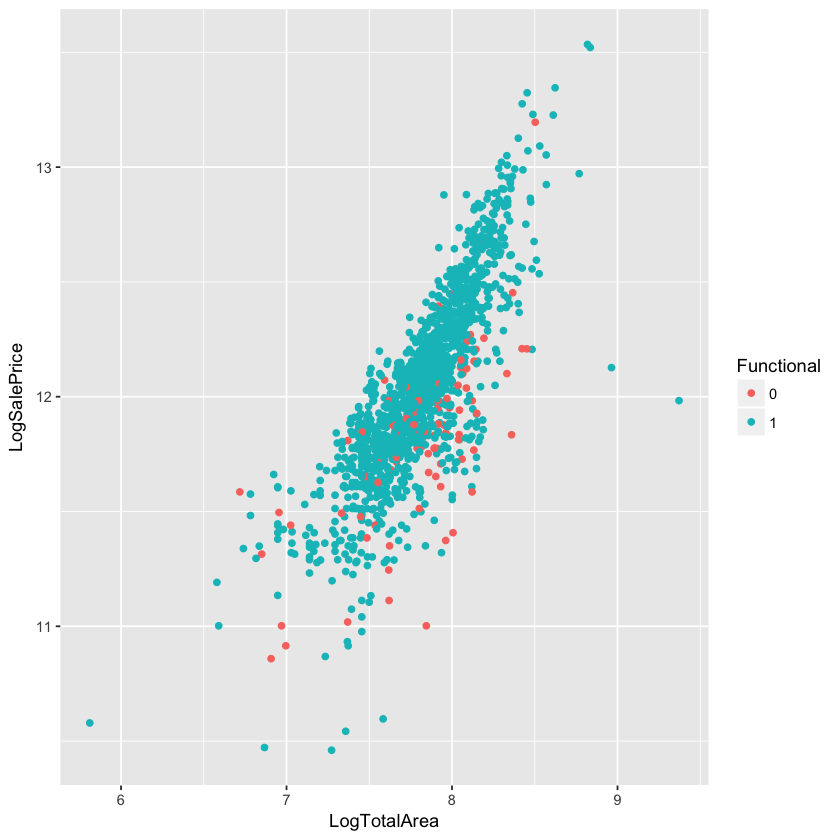

In [39]:
ggplot(train, aes(x = LogTotalArea, y = LogSalePrice, color = factor(Functional))) +
    geom_point() +
    labs(color = "Functional")

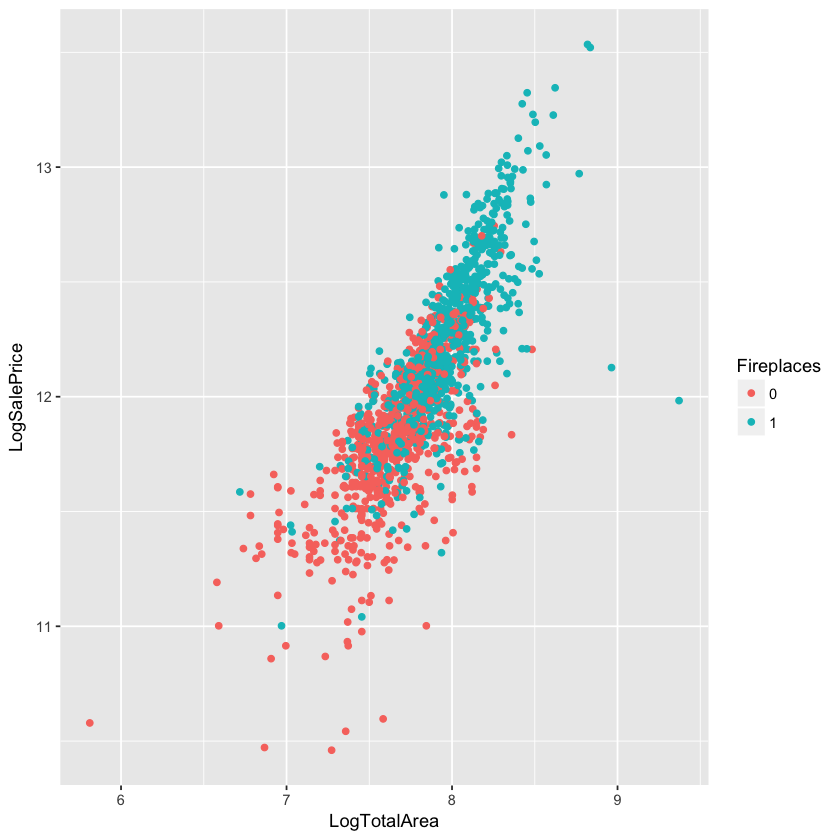

In [40]:
ggplot(train, aes(x = LogTotalArea, y = LogSalePrice, color = factor(Fireplaces))) +
    geom_point() +
    labs(color = "Fireplaces")

Cheaper houses tend to not have a fireplace.

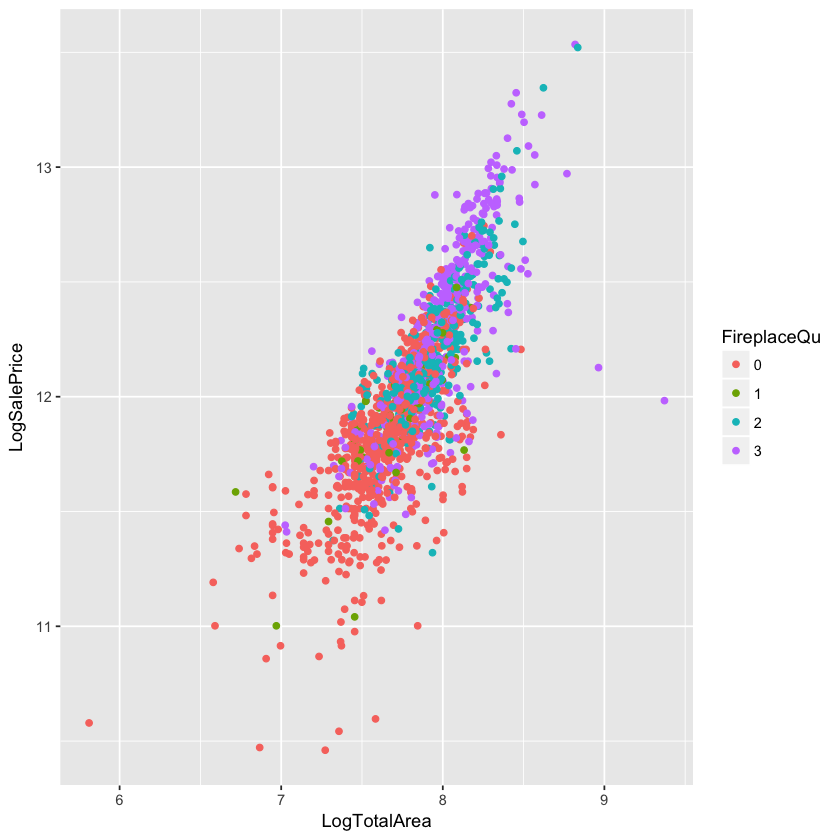

In [41]:
ggplot(train, aes(x = LogTotalArea, y = LogSalePrice, color = factor(FireplaceQu))) +
    geom_point() +
    labs(color = "FireplaceQu")

Most cheaper houses don't have a fireplace and the few that do are in poor quality. But, the quality of fireplaces in expensive houses is above average.

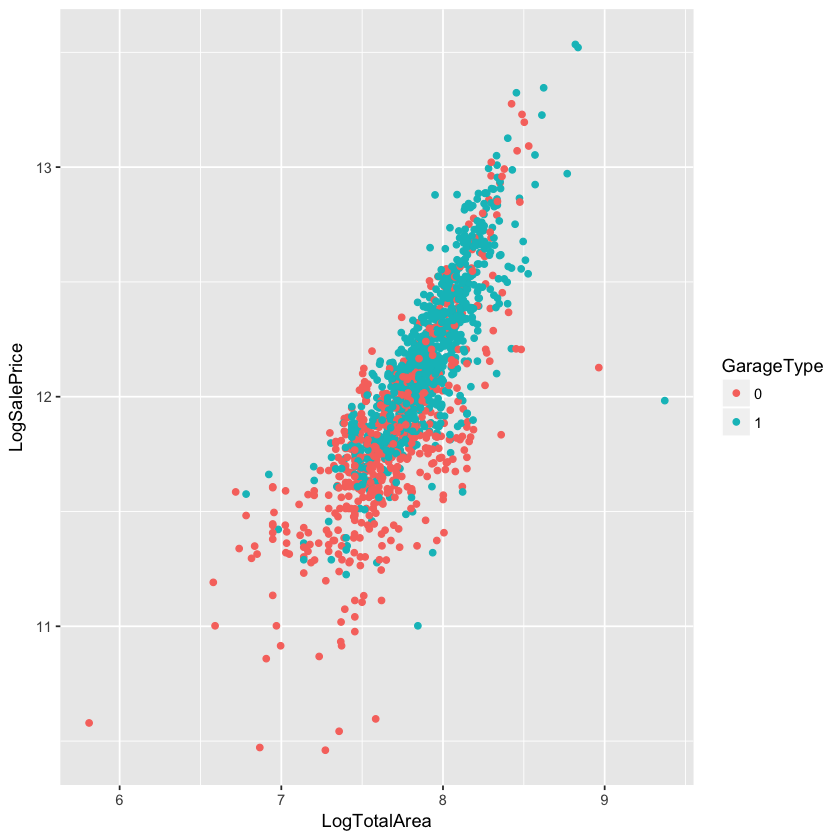

In [42]:
ggplot(train, aes(x = LogTotalArea, y = LogSalePrice, color = factor(GarageType))) +
    geom_point() +
    labs(color = "GarageType")

Cheaper houses tend to have a garage that are not attached to the house. They may have a car port, basement garage, detached garage, built-in garage that is a part of the house, or a mix of these.

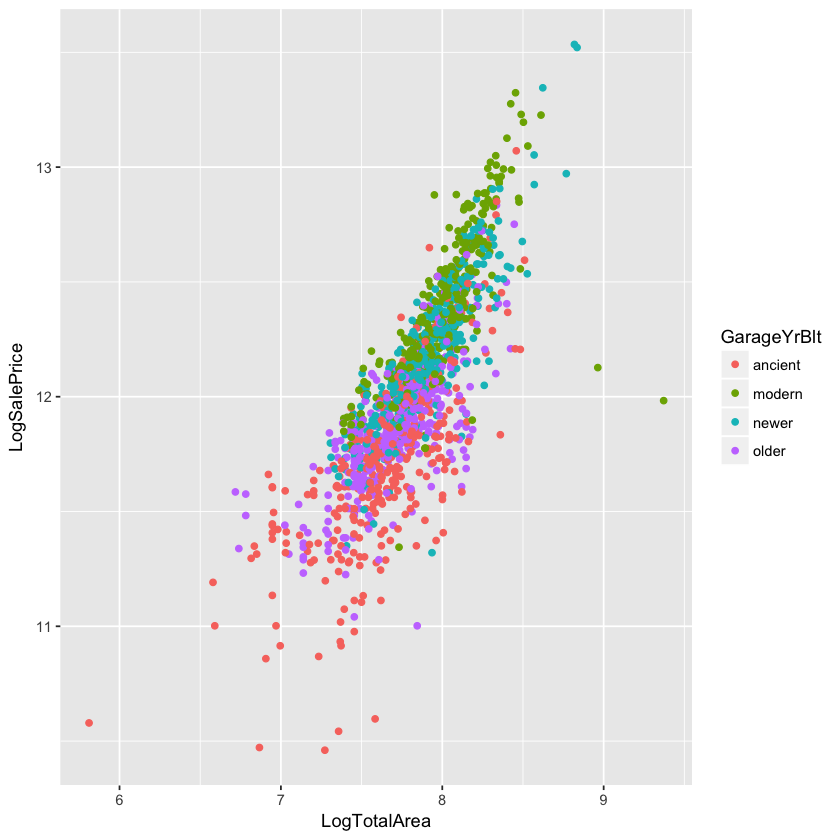

In [43]:
ggplot(train, aes(x = LogTotalArea, y = LogSalePrice, color = factor(GarageYrBlt))) +
    geom_point() +
    labs(color = "GarageYrBlt")

Garages in expensive houses were built after 1977, which aligns with when the house was built.

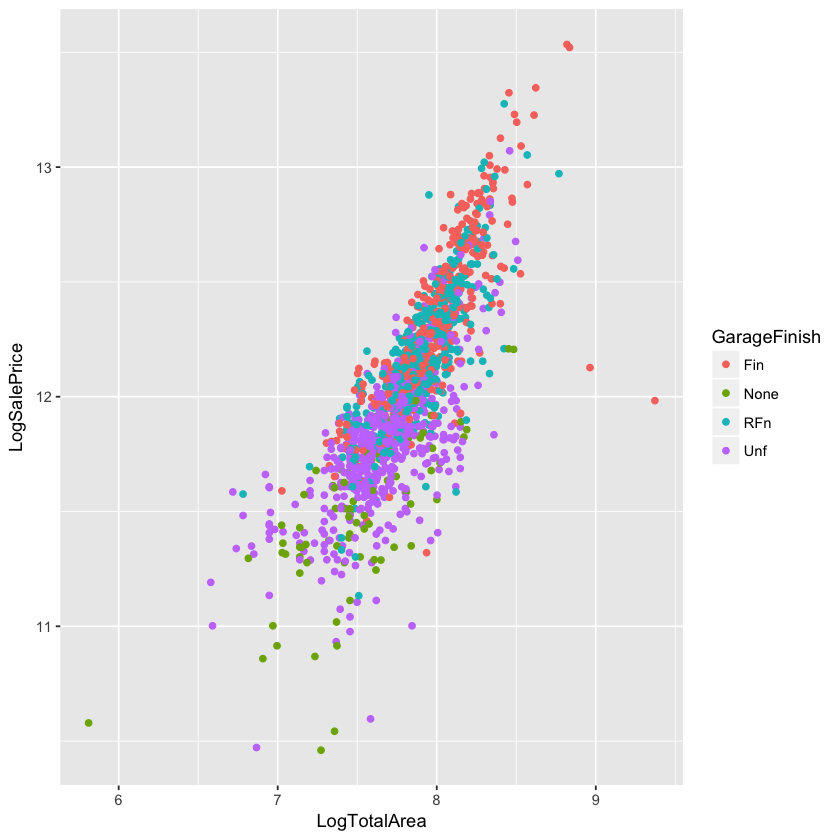

In [44]:
ggplot(train, aes(x = LogTotalArea, y = LogSalePrice, color = factor(GarageFinish))) +
    geom_point() +
    labs(color = "GarageFinish")

The interior of garages in expensive houses is finished, whereas the finish in cheaper houses is little-to-none.

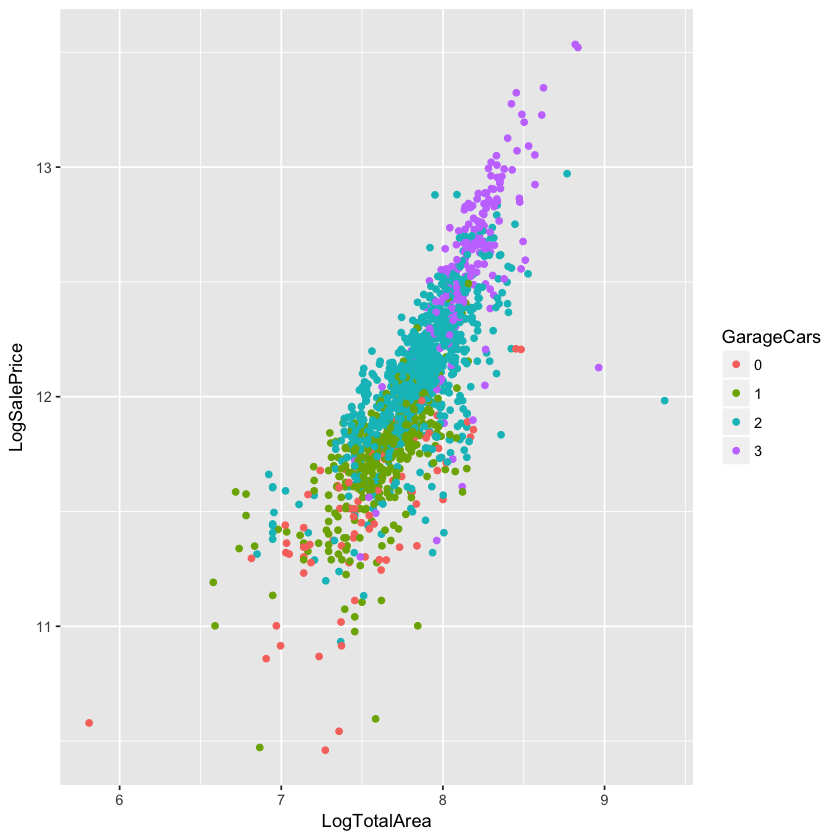

In [45]:
ggplot(train, aes(x = LogTotalArea, y = LogSalePrice, color = factor(GarageCars))) +
    geom_point() +
    labs(color = "GarageCars")

The more expensive a house gets, the bigger is its garage.

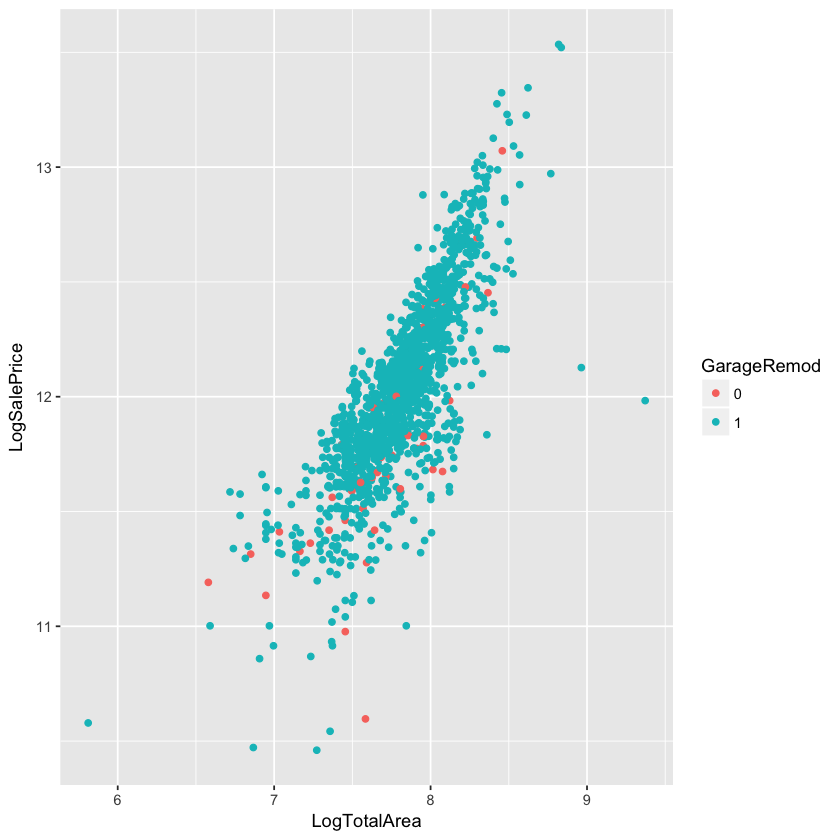

In [46]:
ggplot(train, aes(x = LogTotalArea, y = LogSalePrice, color = factor(GarageRemod))) +
    geom_point() +
    labs(color = "GarageRemod")

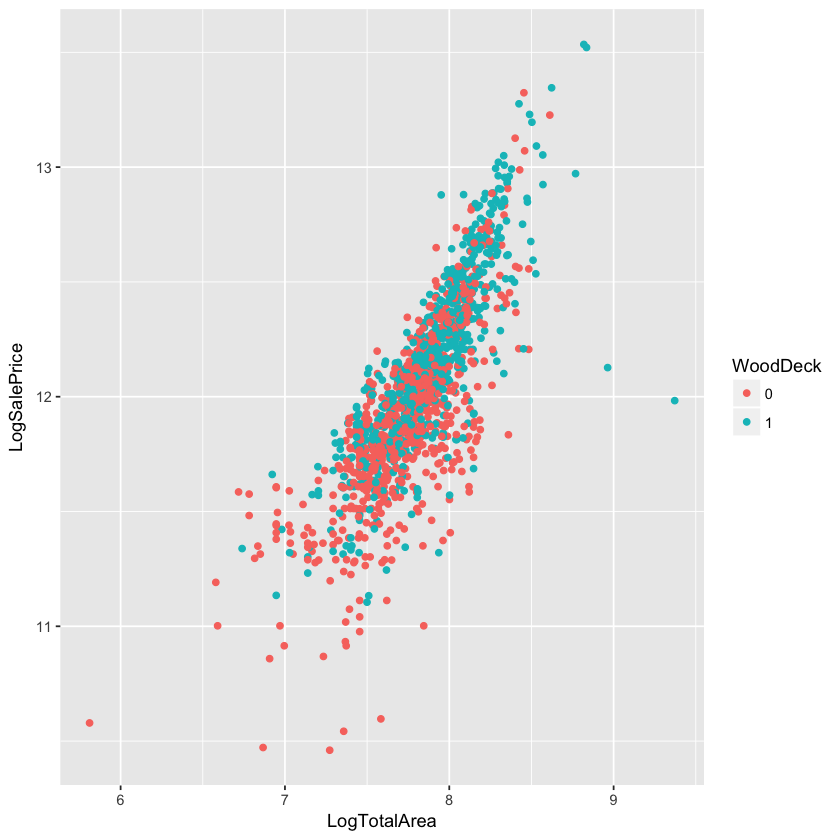

In [47]:
ggplot(train, aes(x = LogTotalArea, y = LogSalePrice, color = factor(WoodDeck))) +
    geom_point() +
    labs(color = "WoodDeck")

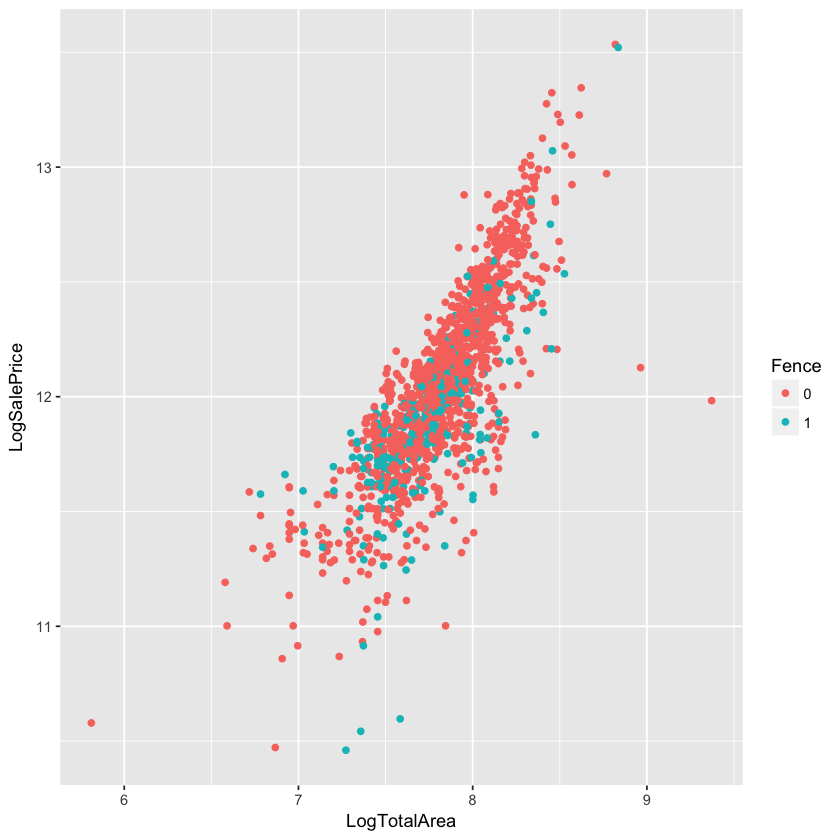

In [48]:
ggplot(train, aes(x = LogTotalArea, y = LogSalePrice, color = factor(Fence))) +
    geom_point() +
    labs(color = "Fence")

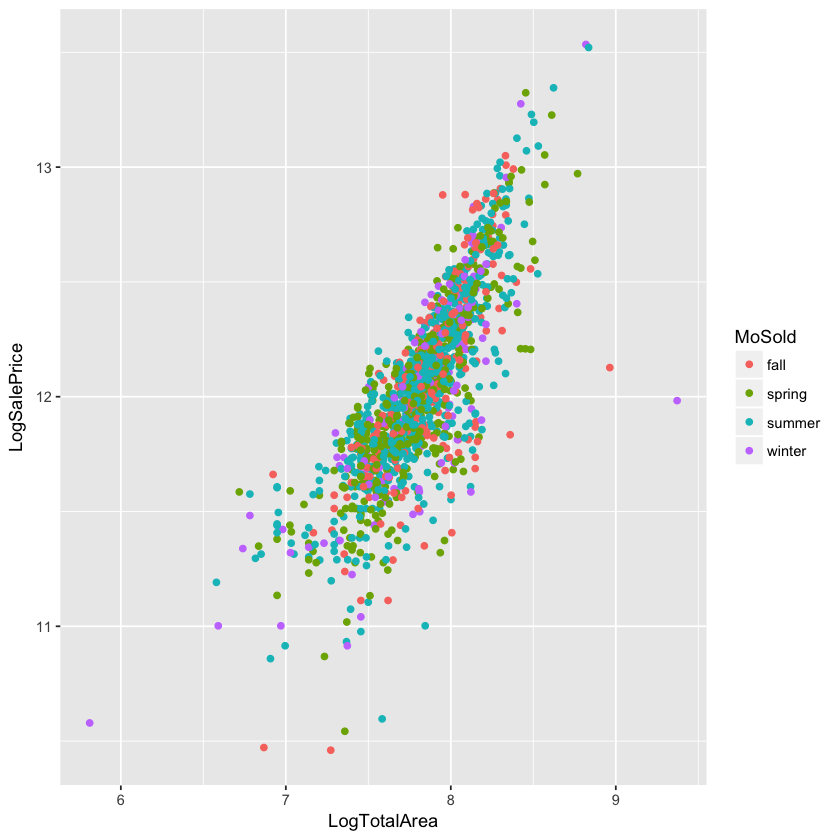

In [49]:
ggplot(train, aes(x = LogTotalArea, y = LogSalePrice, color = factor(MoSold))) +
    geom_point() +
    labs(color = "MoSold")

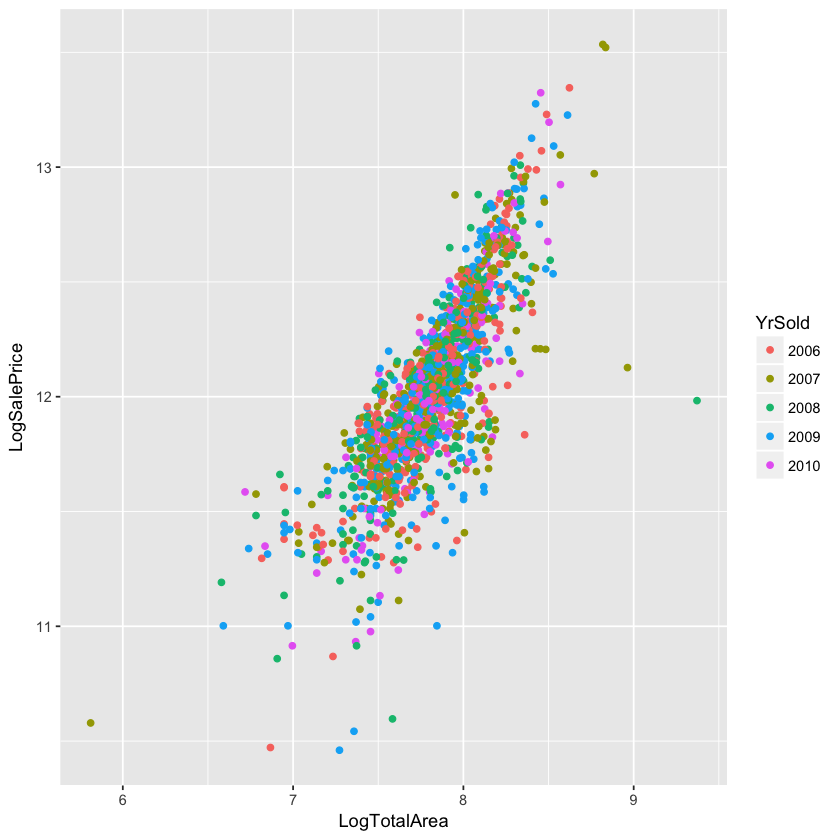

In [50]:
ggplot(train, aes(x = LogTotalArea, y = LogSalePrice, color = factor(YrSold))) +
    geom_point() +
    labs(color = "YrSold")

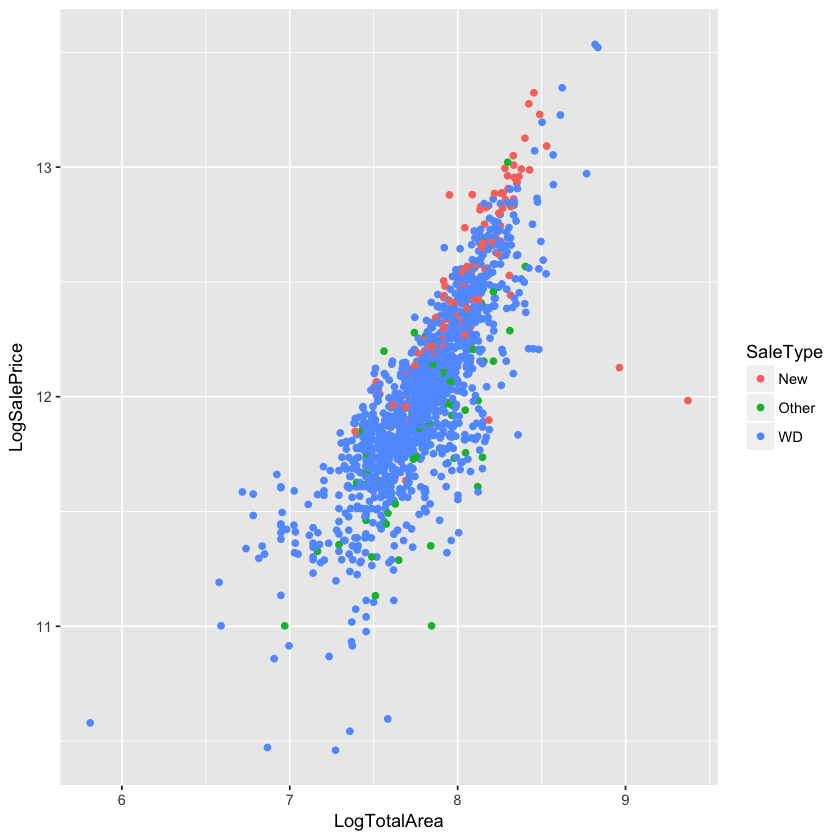

In [51]:
ggplot(train, aes(x = LogTotalArea, y = LogSalePrice, color = factor(SaleType))) +
    geom_point() +
    labs(color = "SaleType")

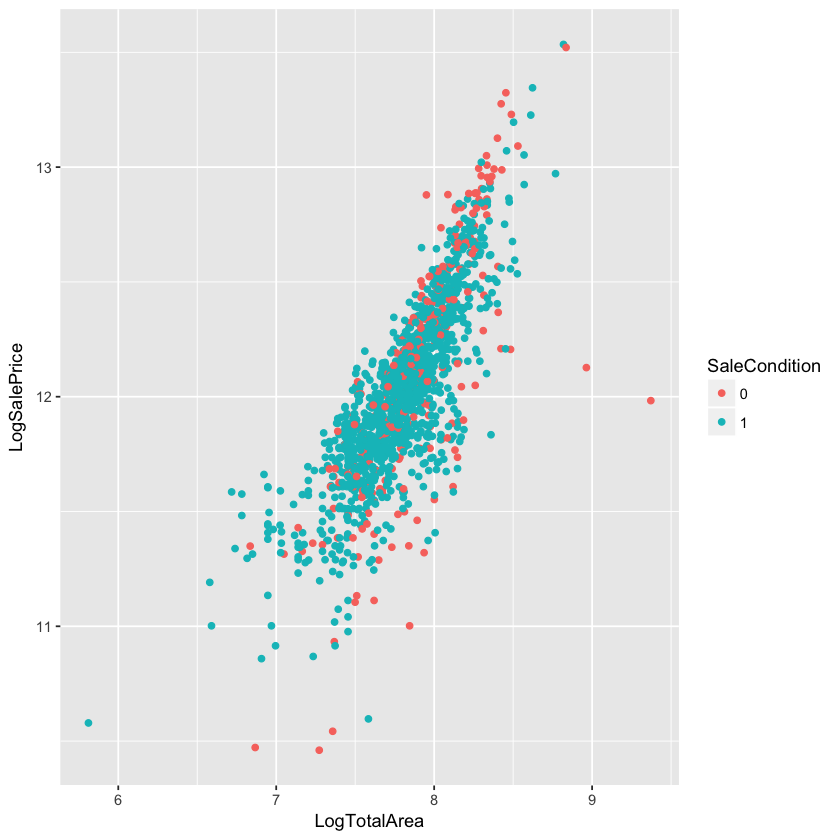

In [52]:
ggplot(train, aes(x = LogTotalArea, y = LogSalePrice, color = factor(SaleCondition))) +
    geom_point() +
    labs(color = "SaleCondition")